In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.metrics import log_loss

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Before Cleaning

In [3]:
path = "/content/drive/Shareddrives/DATA 245 - ML/SF_crime_report.csv"
df = pd.read_csv(path)

In [4]:
df.shape

(585140, 26)

In [5]:
df.head()

Incident Datetime Incident Date Incident Time  Incident Year  \
0  2019/03/05 09:00:00 PM    2019/03/05         21:00           2019   
1  2018/12/22 12:00:00 PM    2018/12/22         12:00           2018   
2  2018/08/24 05:30:00 PM    2018/08/24         17:30           2018   
3  2018/10/20 03:10:00 PM    2018/10/20         15:10           2018   
4  2019/06/05 12:36:00 AM    2019/06/05         00:36           2019   

  Incident Day of Week         Report Datetime       Row ID  Incident ID  \
0              Tuesday  2019/03/07 12:54:00 PM  77808706372       778087   
1             Saturday  2018/12/26 02:29:00 PM  75246907023       752469   
2               Friday  2018/08/24 07:35:00 PM  70675306243       706753   
3             Saturday  2018/10/20 03:10:00 PM  72826462071       728264   
4            Wednesday  2019/06/05 12:37:00 AM  80823030140       808230   

   Incident Number   CAD Number  ...                   Incident Description  \
0        196048512          NaN  ...        Theft, Other Property, $50-$200   
1        180971777  183601903.0  ...            Vehicle, Stolen, Motorcycle   
2        180639339  182363732.0  ...  Theft, From Locked Vehicle, $200-$950   
3        180624631  182933454.0  ...                       Probation Search   
4        190403077  191560061.0  ...                    Air Gun, Possession   

             Resolution                         Intersection         CNN  \
0        Open or Active  UNITED NATIONS PLZ \ LEAVENWORTH ST  30044000.0   
1        Open or Active              LINDEN ST \ BUCHANAN ST  25931000.0   
2        Open or Active                PERU AVE \ BURROWS ST  21610000.0   
3  Cite or Arrest Adult              BOARDMAN PL \ BRYANT ST  23914000.0   
4  Cite or Arrest Adult               LOMBARD ST \ NEWELL ST  30035000.0   

  Police District Analysis Neighborhood Supervisor District   Latitude  \
0      Tenderloin            Tenderloin                 6.0  37.779992   
1        Northern          Hayes Valley                 5.0  37.775787   
2       Ingleside             Excelsior                 9.0  37.723944   
3        Southern       South of Market                 6.0  37.775161   
4         Central           North Beach                 3.0  37.802755   

    Longitude                                          Point  
0 -122.413487  POINT (-122.41348740024354 37.77999173926721)  
1 -122.427819  POINT (-122.42781910073226 37.77578657487239)  
2 -122.422830  POINT (-122.42283006837721 37.72394419349765)  
3 -122.403636   POINT (-122.40363551943442 37.7751608100771)  
4 -122.413623   POINT (-122.4136227157606 37.80275505740129)  

[5 rows x 26 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585140 entries, 0 to 585139
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        585140 non-null  object 
 1   Incident Date            585140 non-null  object 
 2   Incident Time            585140 non-null  object 
 3   Incident Year            585140 non-null  int64  
 4   Incident Day of Week     585140 non-null  object 
 5   Report Datetime          585140 non-null  object 
 6   Row ID                   585140 non-null  int64  
 7   Incident ID              585140 non-null  int64  
 8   Incident Number          585140 non-null  int64  
 9   CAD Number               456082 non-null  float64
 10  Report Type Code         585140 non-null  object 
 11  Report Type Description  585140 non-null  object 
 12  Filed Online             116767 non-null  object 
 13  Incident Code            585140 non-null  int64  
 14  Inci

In [14]:
len(df['Analysis Neighborhood'].unique())

42

In [15]:
df['Analysis Neighborhood'].unique()
# all values are neighborhood names

array(['Tenderloin', 'Hayes Valley', 'Excelsior', 'South of Market',
       'North Beach', 'Financial District/South Beach',
       'Bayview Hunters Point', 'Japantown', 'Pacific Heights',
       'Noe Valley', 'Nob Hill', 'Visitacion Valley', nan,
       'Lone Mountain/USF', 'Mission', 'Marina', 'Inner Sunset',
       'Outer Mission', 'Haight Ashbury', 'Portola', 'Outer Richmond',
       'West of Twin Peaks', 'Chinatown', 'Presidio',
       'Castro/Upper Market', 'Russian Hill', 'Sunset/Parkside',
       'Seacliff', 'Oceanview/Merced/Ingleside', 'Western Addition',
       'Potrero Hill', 'Mission Bay', 'Golden Gate Park',
       'Bernal Heights', 'Lakeshore', 'Twin Peaks', 'Presidio Heights',
       'Inner Richmond', 'Lincoln Park', 'Glen Park', 'McLaren Park',
       'Treasure Island'], dtype=object)

In [16]:
df['Police District'].unique()

array(['Tenderloin', 'Northern', 'Ingleside', 'Southern', 'Central',
       'Bayview', 'Mission', 'Park', 'Taraval', 'Out of SF', 'Richmond'],
      dtype=object)

In [17]:
df['Incident Description'].unique()

array(['Theft, Other Property, $50-$200', 'Vehicle, Stolen, Motorcycle',
       'Theft, From Locked Vehicle, $200-$950', 'Probation Search',
       'Air Gun, Possession', 'Theft, From Building, >$950',
       'State Code Felony (general)', 'Burglary, Store, Unlawful Entry',
       'Violation of Restraining Order',
       'Robbery, Service Station, W/ Force', 'Lost Property',
       'False Personation to Receive Money or Property',
       'Malicious Mischief, Vandalism to Vehicle', 'Battery',
       'Vehicle, Recovered, Stolen outside SF', 'Case Closure',
       'Theft, From Locked Vehicle, >$950',
       'Theft, From Person, >$950 (other than Pickpocket)',
       'Theft, From Building, <$50', 'Robbery, Chain Store, W/ Force',
       'Investigative Detention', 'Trespassing', 'Probation Violation',
       'Driving, No License Issued', 'Assault, Aggravated, W/ Gun',
       'Mental Health Detention', 'Driving, License Suspended or Revoked',
       'Theft, From Unlocked Vehicle, >$950',
   

In [18]:
df.describe()

Incident Year        Row ID   Incident ID  Incident Number  \
count  585140.000000  5.851400e+05  5.851400e+05     5.851400e+05   
mean     2019.576524  8.828370e+10  8.828367e+05     1.973165e+08   
std         1.264442  1.511696e+10  1.511696e+05     1.329216e+07   
min      2018.000000  6.186871e+10  6.186870e+05     0.000000e+00   
25%      2018.000000  7.520992e+10  7.520990e+05     1.862558e+08   
50%      2019.000000  8.829300e+10  8.829295e+05     1.962249e+08   
75%      2021.000000  1.013070e+11  1.013070e+06     2.101725e+08   
max      2022.000000  1.145722e+11  1.145722e+06     9.814243e+08   

         CAD Number  Incident Code           CNN  Supervisor District  \
count  4.560820e+05  585140.000000  5.547120e+05        554712.000000   
mean   1.982837e+08   24835.634901  2.532589e+07             5.965669   
std    2.218597e+07   25743.795883  3.095378e+06             2.810175   
min    1.000000e+00    1000.000000  2.001300e+07             1.000000   
25%    1.836529e+08    6244.000000  2.396700e+07             3.000000   
50%    2.000117e+08    7041.000000  2.492500e+07             6.000000   
75%    2.107111e+08   51040.000000  2.647000e+07             8.000000   
max    1.000000e+09   75030.000000  5.420300e+07            11.000000   

            Latitude      Longitude  
count  554712.000000  554712.000000  
mean       37.769249    -122.423997  
std         0.024381       0.026351  
min        37.707988    -122.511295  
25%        37.755214    -122.434602  
50%        37.775764    -122.417806  
75%        37.785893    -122.407323  
max        37.829991    -122.363743

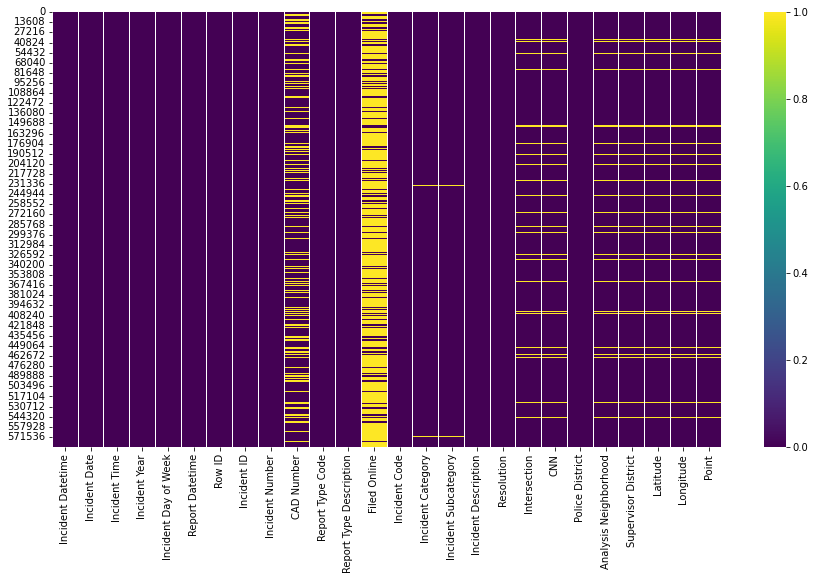

In [19]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#Finding the Missing Values
sns.heatmap(df.isnull(),cmap = 'viridis')

In [20]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Filed Online             468373                     80.044605
CAD Number               129058                     22.055918
Analysis Neighborhood     30543                      5.219776
Point                     30428                      5.200123
Longitude                 30428                      5.200123
Latitude                  30428                      5.200123
Supervisor District       30428                      5.200123
CNN                       30428                      5.200123
Intersection              30428                      5.200123
Incident Category           500                      0.085450
Incident Subcategory        500                      0.085450
Police District               0                      0.000000
Resolution                    0                      0.000000
Incident Description          0                      0.000000
Incident Datetime             0                      0.000000
Incident Date                 0                      0.000000
Report Type Description       0                      0.000000
Report Type Code              0                      0.000000
Incident Number               0                      0.000000
Incident ID                   0                      0.000000
Row ID                        0                      0.000000
Report Datetime               0                      0.000000
Incident Day of Week          0                      0.000000
Incident Year                 0                      0.000000
Incident Time                 0                      0.000000
Incident Code                 0                      0.000000

In [21]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

Incident Year    Row ID  Incident ID  Incident Number  \
Incident Year             1.000000  0.965425     0.965425         0.935664   
Row ID                    0.965425  1.000000     1.000000         0.918616   
Incident ID               0.965425  1.000000     1.000000         0.918616   
Incident Number           0.935664  0.918616     0.918616         1.000000   
CAD Number                0.563495  0.568031     0.568031         0.564442   
Incident Code            -0.024619 -0.025892    -0.025894        -0.061986   
CNN                      -0.006003 -0.002790    -0.002790         0.006024   
Supervisor District       0.006209  0.003531     0.003531        -0.012673   
Latitude                 -0.020119 -0.019199    -0.019199        -0.003507   
Longitude                -0.019864 -0.021737    -0.021737        -0.028963   

                     CAD Number  Incident Code       CNN  Supervisor District  \
Incident Year          0.563495      -0.024619 -0.006003             0.006209   
Row ID                 0.568031      -0.025892 -0.002790             0.003531   
Incident ID            0.568031      -0.025894 -0.002790             0.003531   
Incident Number        0.564442      -0.061986  0.006024            -0.012673   
CAD Number             1.000000      -0.010667 -0.005599             0.008237   
Incident Code         -0.010667       1.000000 -0.032793             0.059376   
CNN                   -0.005599      -0.032793  1.000000            -0.412918   
Supervisor District    0.008237       0.059376 -0.412918             1.000000   
Latitude              -0.014868      -0.049021  0.374118            -0.764195   
Longitude             -0.003480       0.015478 -0.201558             0.318425   

                     Latitude  Longitude  
Incident Year       -0.020119  -0.019864  
Row ID              -0.019199  -0.021737  
Incident ID         -0.019199  -0.021737  
Incident Number     -0.003507  -0.028963  
CAD Number          -0.014868  -0.003480  
Incident Code       -0.049021   0.015478  
CNN                  0.374118  -0.201558  
Supervisor District -0.764195   0.318425  
Latitude             1.000000   0.154794  
Longitude            0.154794   1.000000

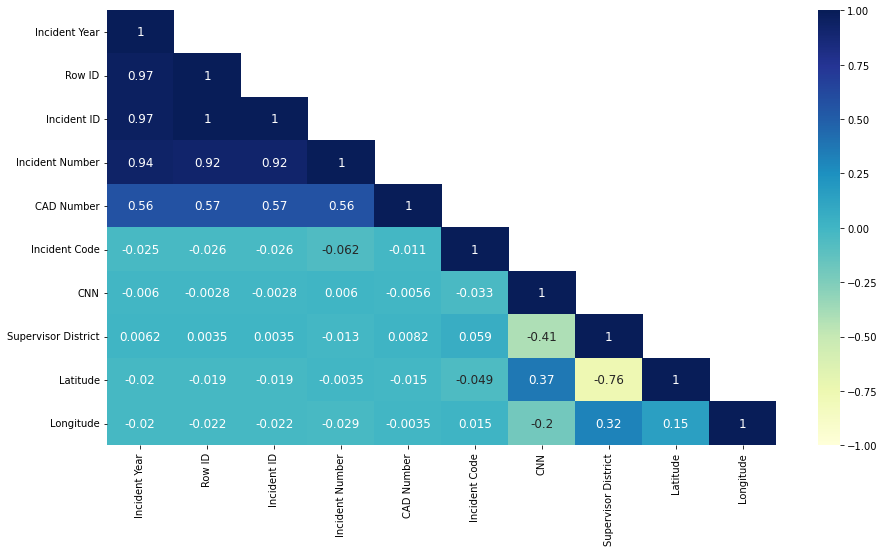

In [22]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

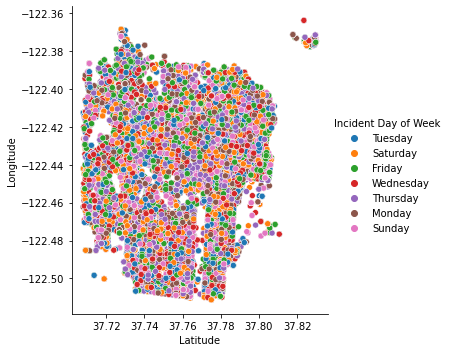

In [23]:
sns.relplot(x='Latitude', y ='Longitude', hue='Incident Day of Week', data=df) 
plt.rcParams['figure.figsize'] = [15,8]

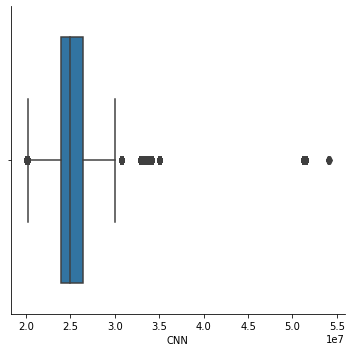

In [24]:
sns.catplot(x='CNN', kind='box', data=df)

In [25]:
df[['Incident Category', 'Incident Day of Week']].value_counts().head(10)

Incident Category    Incident Day of Week
Larceny Theft        Friday                  28020
                     Saturday                26941
                     Wednesday               25082
                     Monday                  24794
                     Sunday                  24590
                     Thursday                24474
                     Tuesday                 23664
Other Miscellaneous  Wednesday                6600
                     Friday                   6147
Malicious Mischief   Friday                   6075
dtype: int64

Text(0.5, 1.0, 'Crime counts')

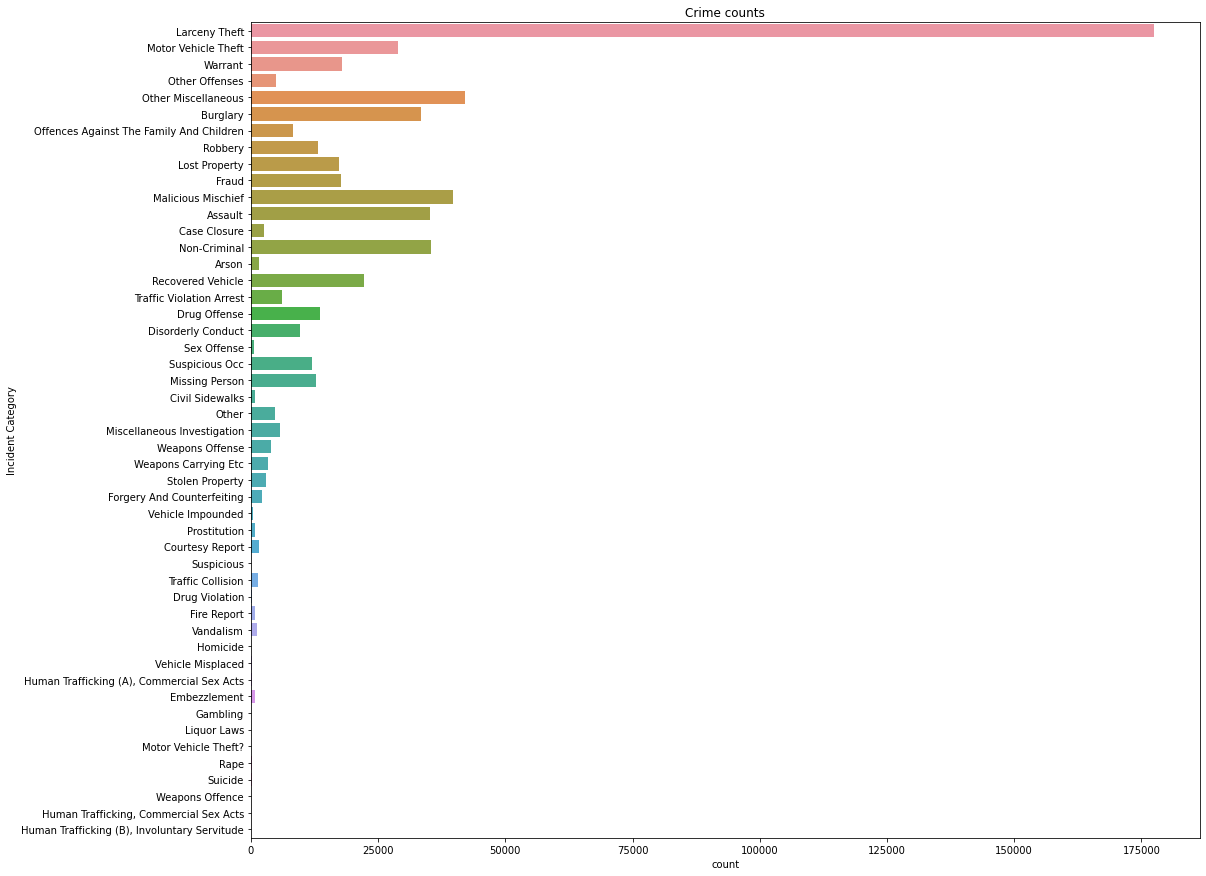

In [26]:
fig, count = plt.subplots(figsize = (17,15))
count = sns.countplot(y = df['Incident Category'])
count.set_title('Crime counts')

In [27]:
category_freqency = pd.DataFrame(df['Incident Category'].value_counts(normalize=True))
category_freqency.reset_index(inplace=True)
category_freqency.rename({'index': 'Incident Category', 'Incident Category': 'Frequency'}, axis='columns', inplace=True)
category_freqency['Cumulative Frequency'] = category_freqency['Frequency'].cumsum()
category_freqency

Incident Category  Frequency  \
0                                  Larceny Theft   0.303717   
1                            Other Miscellaneous   0.071813   
2                             Malicious Mischief   0.067758   
3                                   Non-Criminal   0.060624   
4                                        Assault   0.060278   
5                                       Burglary   0.057035   
6                            Motor Vehicle Theft   0.049333   
7                              Recovered Vehicle   0.037982   
8                                        Warrant   0.030453   
9                                          Fraud   0.030296   
10                                 Lost Property   0.029740   
11                                  Drug Offense   0.023260   
12                                       Robbery   0.022693   
13                                Missing Person   0.021974   
14                                Suspicious Occ   0.020454   
15                            Disorderly Conduct   0.016638   
16      Offences Against The Family And Children   0.014046   
17                      Traffic Violation Arrest   0.010490   
18                   Miscellaneous Investigation   0.009904   
19                                Other Offenses   0.008422   
20                                         Other   0.008078   
21                               Weapons Offense   0.006625   
22                          Weapons Carrying Etc   0.005663   
23                               Stolen Property   0.005121   
24                                  Case Closure   0.004310   
25                    Forgery And Counterfeiting   0.003650   
26                                         Arson   0.002853   
27                               Courtesy Report   0.002843   
28                             Traffic Collision   0.002249   
29                                     Vandalism   0.002013   
30                                  Prostitution   0.001519   
31                               Civil Sidewalks   0.001514   
32                                   Fire Report   0.001391   
33                                  Embezzlement   0.001322   
34                                   Sex Offense   0.001072   
35                             Vehicle Impounded   0.000669   
36                                       Suicide   0.000426   
37                             Vehicle Misplaced   0.000414   
38                                Drug Violation   0.000327   
39                                          Rape   0.000245   
40    Human Trafficking (A), Commercial Sex Acts   0.000207   
41                                    Suspicious   0.000156   
42                          Motor Vehicle Theft?   0.000118   
43                                      Homicide   0.000116   
44                                   Liquor Laws   0.000075   
45                                      Gambling   0.000044   
46                               Weapons Offence   0.000034   
47        Human Trafficking, Commercial Sex Acts   0.000034   
48  Human Trafficking (B), Involuntary Servitude   0.000002   

    Cumulative Frequency  
0               0.303717  
1               0.375530  
2               0.443288  
3               0.503912  
4               0.564190  
5               0.621225  
6               0.670558  
7               0.708540  
8               0.738993  
9               0.769289  
10              0.799028  
11              0.822289  
12              0.844982  
13              0.866956  
14              0.887409  
15              0.904047  
16              0.918093  
17              0.928583  
18              0.938487  
19              0.946909  
20              0.954988  
21              0.961612  
22              0.967276  
23              0.972397  
24              0.976707  
25              0.980357  
26              0.983210  
27              0.986053  
28              0.988302  
29              0.990315  
30              0.991834  
31              

In [28]:
candidate_class = list(category_freqency.loc[category_freqency['Cumulative Frequency'] < 0.8, 'Incident Category'])
candidate_class

['Larceny Theft',
 'Other Miscellaneous',
 'Malicious Mischief',
 'Non-Criminal',
 'Assault',
 'Burglary',
 'Motor Vehicle Theft',
 'Recovered Vehicle',
 'Warrant',
 'Fraud',
 'Lost Property']

In [29]:
reduced_categories = df.loc[df['Incident Category'].isin(candidate_class)]
reduced_categories

Incident Datetime Incident Date Incident Time  Incident Year  \
0       2019/03/05 09:00:00 PM    2019/03/05         21:00           2019   
1       2018/12/22 12:00:00 PM    2018/12/22         12:00           2018   
2       2018/08/24 05:30:00 PM    2018/08/24         17:30           2018   
3       2018/10/20 03:10:00 PM    2018/10/20         15:10           2018   
5       2019/02/12 07:00:00 AM    2019/02/12         07:00           2019   
...                        ...           ...           ...            ...   
585132  2020/09/12 07:35:00 PM    2020/09/12         19:35           2020   
585134  2020/07/16 04:00:00 PM    2020/07/16         16:00           2020   
585136  2020/08/01 05:34:00 PM    2020/08/01         17:34           2020   
585137  2020/06/01 01:55:00 AM    2020/06/01         01:55           2020   
585138  2020/10/24 05:00:00 PM    2020/10/24         17:00           2020   

       Incident Day of Week         Report Datetime       Row ID  Incident ID  \
0                   Tuesday  2019/03/07 12:54:00 PM  77808706372       778087   
1                  Saturday  2018/12/26 02:29:00 PM  75246907023       752469   
2                    Friday  2018/08/24 07:35:00 PM  70675306243       706753   
3                  Saturday  2018/10/20 03:10:00 PM  72826462071       728264   
5                   Tuesday  2019/02/12 09:20:00 AM  76962406304       769624   
...                     ...                     ...          ...          ...   
585132             Saturday  2020/09/12 07:35:00 PM  96084327068       960843   
585134             Thursday  2020/07/17 01:26:00 PM  94458906301       944589   
585136             Saturday  2020/08/01 06:04:00 PM  94911806361       949118   
585137               Monday  2020/06/01 01:55:00 AM  93192005061       931920   
585138             Saturday  2020/10/24 06:34:00 PM  97231606244       972316   

        Incident Number   CAD Number  ...  \
0             196048512          NaN  ...   
1             180971777  183601903.0  ...   
2             180639339  182363732.0  ...   
3             180624631  182933454.0  ...   
5             190106328  190430997.0  ...   
...                 ...          ...  ...   
585132        200549945  202562568.0  ...   
585134        200427733  201991610.0  ...   
585136        200461010  202142200.0  ...   
585137        200330863  201530294.0  ...   
585138        200642975  202982445.0  ...   

                         Incident Description            Resolution  \
0             Theft, Other Property, $50-$200        Open or Active   
1                 Vehicle, Stolen, Motorcycle        Open or Active   
2       Theft, From Locked Vehicle, $200-$950        Open or Active   
3                            Probation Search  Cite or Arrest Adult   
5                 Theft, From Building, >$950        Open or Active   
...                                       ...                   ...   
585132              False Report of Emergency        Open or Active   
585134             Theft, From Building, <$50        Open or Active   
585136               Theft, Shoplifting, <$50        Open or Active   
585137    Burglary, Warehouse, Forcible Entry        Open or Active   
585138      Theft, From Locked Vehicle, >$950        Open or Active   

                               Intersection         CNN Police District  \
0       UNITED NATIONS PLZ \ LEAVENWORTH ST  30044000.0      Tenderloin   
1                   LINDEN ST \ BUCHANAN ST  25931000.0        Northern   
2                     PERU AVE \ BURROWS ST  21610000.0       Ingleside   
3                   BOARDMAN PL \ BRYANT ST  23914000.0        Southern   
5             NEW MONTGOMERY ST \ JESSIE ST  24620000.0        Southern   
...                                     ...         ...             ...   
585132                 BALBOA ST \ 08TH AVE  27278000.0        Richmond   
585134                AVENUE D \ 09TH TI ST  34071000.0        Southern   
585136                GEARY BLVD \ 17TH AVE  2

Text(0.5, 1.0, ' The Most  Occuring Crimes in SF')

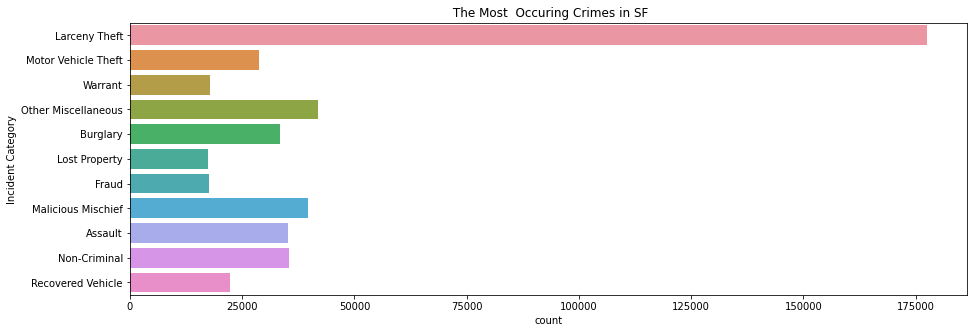

In [30]:
fig, count = plt.subplots(figsize = (15,5))
count = sns.countplot(y = reduced_categories['Incident Category'])
count.set_title(' The Most  Occuring Crimes in SF')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


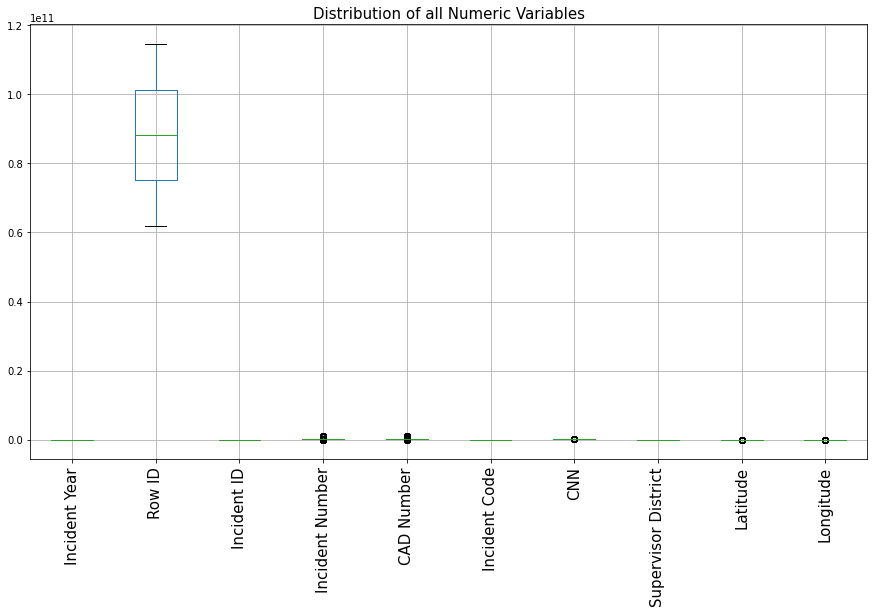

In [31]:
# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


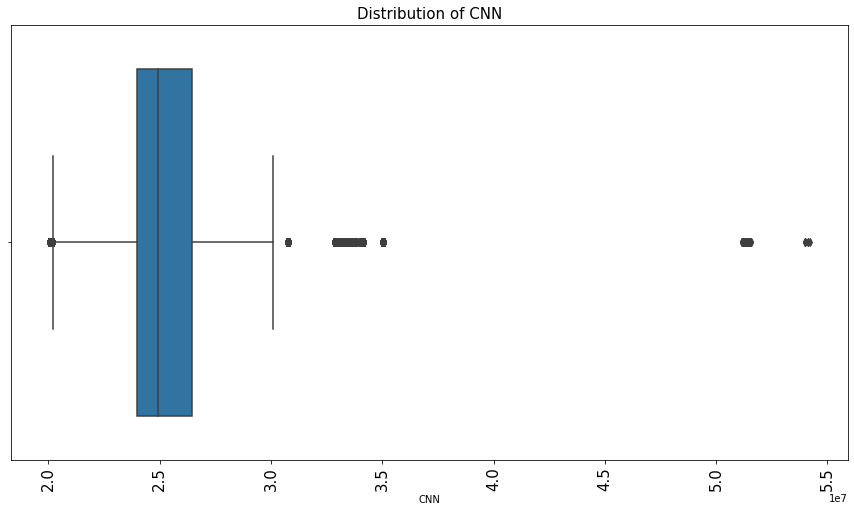

In [32]:
sns.boxplot(df['CNN'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of CNN', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


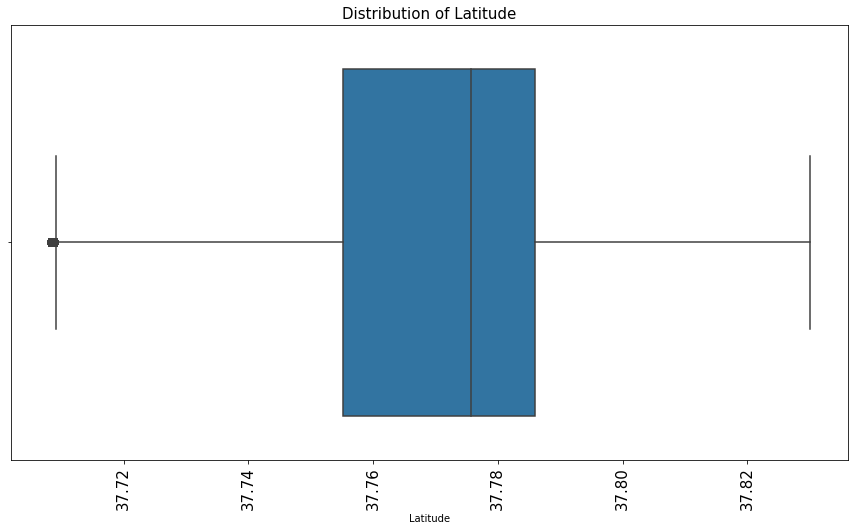

In [33]:
sns.boxplot(df['Latitude'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Latitude', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


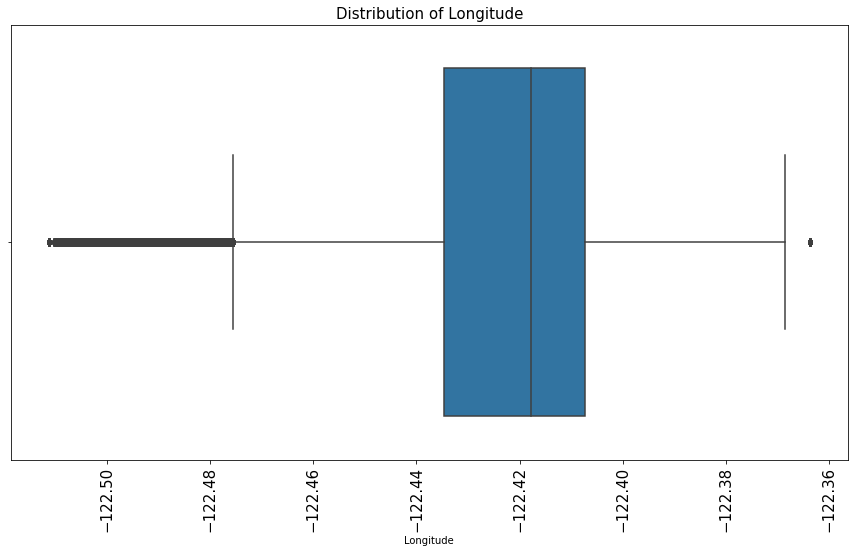

In [34]:
sns.boxplot(df['Longitude'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Longitude', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


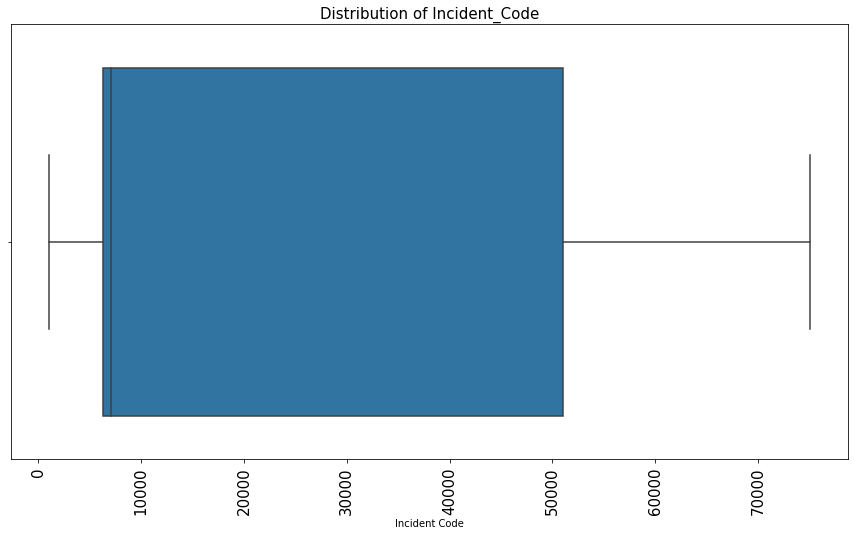

In [35]:
sns.boxplot(df['Incident Code'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Incident_Code', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [36]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Filed Online             468373                     80.044605
CAD Number               129058                     22.055918
Analysis Neighborhood     30543                      5.219776
Point                     30428                      5.200123
Longitude                 30428                      5.200123
Latitude                  30428                      5.200123
Supervisor District       30428                      5.200123
CNN                       30428                      5.200123
Intersection              30428                      5.200123
Incident Category           500                      0.085450
Incident Subcategory        500                      0.085450
Police District               0                      0.000000
Resolution                    0                      0.000000
Incident Description          0                      0.000000
Incident Datetime             0                      0.000000
Incident Date                 0                      0.000000
Report Type Description       0                      0.000000
Report Type Code              0                      0.000000
Incident Number               0                      0.000000
Incident ID                   0                      0.000000
Row ID                        0                      0.000000
Report Datetime               0                      0.000000
Incident Day of Week          0                      0.000000
Incident Year                 0                      0.000000
Incident Time                 0                      0.000000
Incident Code                 0                      0.000000

# After Cleaning

In [37]:
path = "/content/drive/Shareddrives/DATA 245 - ML/cleaned_SF_crime_report.csv"
df = pd.read_csv(path)

In [38]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [39]:
df.head()

Incident_Date Incident_Time Incident_Day_of_Week         Report_Datetime  \
0    2019/03/05         21:00              Tuesday  2019/03/07 12:54:00 PM   
1    2018/12/22         12:00             Saturday  2018/12/26 02:29:00 PM   
2    2018/08/24         17:30               Friday  2018/08/24 07:35:00 PM   
3    2018/10/20         15:10             Saturday  2018/10/20 03:10:00 PM   
4    2019/06/05         00:36            Wednesday  2019/06/05 12:37:00 AM   

        Row_ID  Incident_ID  Incident_Number Report_Type_Code  \
0  77808706372       778087        196048512               II   
1  75246907023       752469        180971777               VI   
2  70675306243       706753        180639339               II   
3  72826462071       728264        180624631               IS   
4  80823030140       808230        190403077               II   

  Report_Type_Description  Filed_Online  ...    Incident_Category  \
0        Coplogic Initial          True  ...        Larceny Theft   
1         Vehicle Initial         False  ...  Motor Vehicle Theft   
2                 Initial         False  ...        Larceny Theft   
3      Initial Supplement         False  ...              Warrant   
4                 Initial         False  ...       Other Offenses   

     Incident_Subcategory                   Incident_Description  \
0   Larceny Theft - Other        Theft, Other Property, $50-$200   
1     Motor Vehicle Theft            Vehicle, Stolen, Motorcycle   
2  Larceny - From Vehicle  Theft, From Locked Vehicle, $200-$950   
3                   Other                       Probation Search   
4                   Other                    Air Gun, Possession   

             Resolution         CNN  Police_District Analysis_Neighborhood  \
0        Open or Active  30044000.0       Tenderloin            Tenderloin   
1        Open or Active  25931000.0         Northern          Hayes Valley   
2        Open or Active  21610000.0        Ingleside             Excelsior   
3  Cite or Arrest Adult  23914000.0         Southern       South of Market   
4  Cite or Arrest Adult  30035000.0          Central           North Beach   

  Supervisor_District   Latitude   Longitude  
0                 6.0  37.779992 -122.413487  
1                 5.0  37.775787 -122.427819  
2                 9.0  37.723944 -122.422830  
3                 6.0  37.775161 -122.403636  
4                 3.0  37.802755 -122.413623  

[5 rows x 21 columns]

In [40]:
df.shape 

(554712, 21)

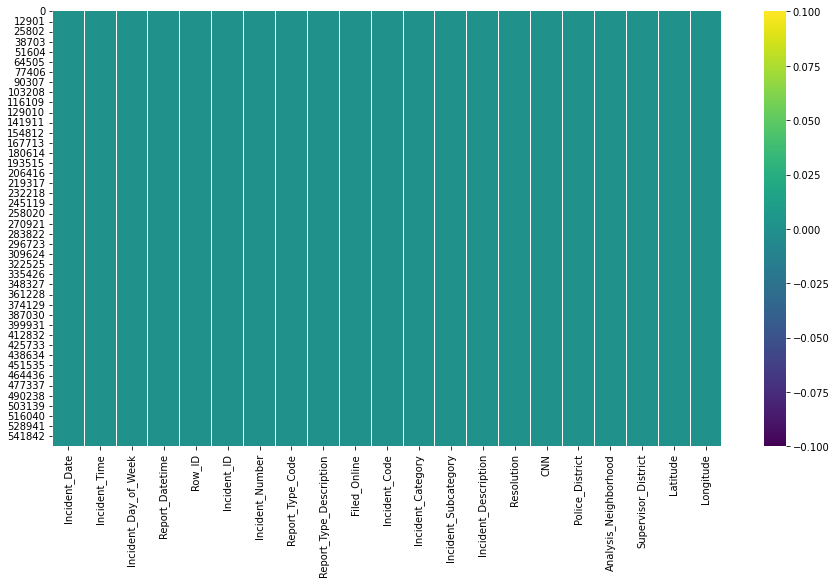

In [41]:
#Finding the Missing Values
sns.heatmap(df.isnull(),cmap = 'viridis')

In [42]:

df.isnull().sum()

Incident_Date              0
Incident_Time              0
Incident_Day_of_Week       0
Report_Datetime            0
Row_ID                     0
Incident_ID                0
Incident_Number            0
Report_Type_Code           0
Report_Type_Description    0
Filed_Online               0
Incident_Code              0
Incident_Category          0
Incident_Subcategory       0
Incident_Description       0
Resolution                 0
CNN                        0
Police_District            0
Analysis_Neighborhood      0
Supervisor_District        0
Latitude                   0
Longitude                  0
dtype: int64

In [43]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Incident_Date                0                           0.0
Incident_Category            0                           0.0
Latitude                     0                           0.0
Supervisor_District          0                           0.0
Analysis_Neighborhood        0                           0.0
Police_District              0                           0.0
CNN                          0                           0.0
Resolution                   0                           0.0
Incident_Description         0                           0.0
Incident_Subcategory         0                           0.0
Incident_Code                0                           0.0
Incident_Time                0                           0.0
Filed_Online                 0                           0.0
Report_Type_Description      0                           0.0
Report_Type_Code             0                           0.0
Incident_Number              0                           0.0
Incident_ID                  0                           0.0
Row_ID                       0                           0.0
Report_Datetime              0                           0.0
Incident_Day_of_Week         0                           0.0
Longitude                    0                           0.0

In [44]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

Row_ID  Incident_ID  Incident_Number  Filed_Online  \
Row_ID               1.000000     1.000000         0.928391     -0.032634   
Incident_ID          1.000000     1.000000         0.928391     -0.032633   
Incident_Number      0.928391     0.928391         1.000000      0.117950   
Filed_Online        -0.032634    -0.032633         0.117950      1.000000   
Incident_Code       -0.025319    -0.025320        -0.060484     -0.202151   
CNN                 -0.002790    -0.002790         0.006024      0.055657   
Supervisor_District  0.003531     0.003531        -0.012673     -0.116576   
Latitude            -0.019199    -0.019199        -0.003507      0.110611   
Longitude           -0.021737    -0.021737        -0.028963     -0.052246   

                     Incident_Code       CNN  Supervisor_District  Latitude  \
Row_ID                   -0.025319 -0.002790             0.003531 -0.019199   
Incident_ID              -0.025320 -0.002790             0.003531 -0.019199   
Incident_Number          -0.060484  0.006024            -0.012673 -0.003507   
Filed_Online             -0.202151  0.055657            -0.116576  0.110611   
Incident_Code             1.000000 -0.032793             0.059376 -0.049021   
CNN                      -0.032793  1.000000            -0.412918  0.374118   
Supervisor_District       0.059376 -0.412918             1.000000 -0.764195   
Latitude                 -0.049021  0.374118            -0.764195  1.000000   
Longitude                 0.015478 -0.201558             0.318425  0.154794   

                     Longitude  
Row_ID               -0.021737  
Incident_ID          -0.021737  
Incident_Number      -0.028963  
Filed_Online         -0.052246  
Incident_Code         0.015478  
CNN                  -0.201558  
Supervisor_District   0.318425  
Latitude              0.154794  
Longitude             1.000000

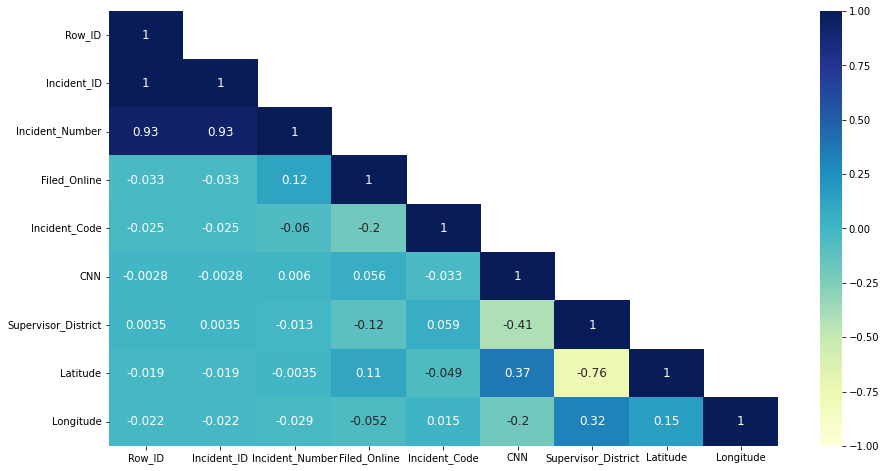

In [45]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

row ID and incident ID are both unique IDs, so we drop one of them

In [46]:
df.drop(['Row_ID'], axis =1, inplace=True)
df.drop(['Incident_Number'], axis =1, inplace=True)

In [47]:
df.dtypes

Incident_Date               object
Incident_Time               object
Incident_Day_of_Week        object
Report_Datetime             object
Incident_ID                  int64
Report_Type_Code            object
Report_Type_Description     object
Filed_Online                  bool
Incident_Code                int64
Incident_Category           object
Incident_Subcategory        object
Incident_Description        object
Resolution                  object
CNN                        float64
Police_District             object
Analysis_Neighborhood       object
Supervisor_District        float64
Latitude                   float64
Longitude                  float64
dtype: object

**Changing the column types**

In [48]:
df['Report_Datetime'] = pd.to_datetime(df['Report_Datetime'])
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'])

In [49]:
df['Report_Type_Code'].unique()

array(['II', 'VI', 'IS', 'VS'], dtype=object)

In [50]:
df['Incident_Category'].unique()

array(['Larceny Theft', 'Motor Vehicle Theft', 'Warrant',
       'Other Offenses', 'Other Miscellaneous', 'Burglary',
       'Offences Against The Family And Children', 'Robbery',
       'Lost Property', 'Fraud', 'Malicious Mischief', 'Assault',
       'Case Closure', 'Non-Criminal', 'Arson', 'Recovered Vehicle',
       'Traffic Violation Arrest', 'Drug Offense', 'Disorderly Conduct',
       'Sex Offense', 'Suspicious Occ', 'Missing Person',
       'Civil Sidewalks', 'Other', 'Miscellaneous Investigation',
       'Weapons Offense', 'Weapons Carrying Etc', 'Stolen Property',
       'Forgery And Counterfeiting', 'Vehicle Impounded', 'Prostitution',
       'Courtesy Report', 'Suspicious', 'Traffic Collision',
       'Drug Violation', 'Fire Report', 'Vandalism', 'Homicide',
       'Vehicle Misplaced', 'Human Trafficking (A), Commercial Sex Acts',
       'Embezzlement', 'Gambling', 'Liquor Laws', 'Motor Vehicle Theft?',
       'Rape', 'Suicide', 'Weapons Offence',
       'Human Trafficking,

In [61]:
import datetime
df['year'] = pd. DatetimeIndex(df['Incident_Date']).year
# df.head()

Incident_Date Incident_Time Incident_Day_of_Week     Report_Datetime  \
0    2019-03-05         21:00              Tuesday 2019-03-07 12:54:00   
1    2018-12-22         12:00             Saturday 2018-12-26 14:29:00   
2    2018-08-24         17:30               Friday 2018-08-24 19:35:00   
3    2018-10-20         15:10             Saturday 2018-10-20 15:10:00   
4    2019-06-05         00:36            Wednesday 2019-06-05 00:37:00   

   Incident_ID Report_Type_Code Report_Type_Description  Filed_Online  \
0       778087               II        Coplogic Initial          True   
1       752469               VI         Vehicle Initial         False   
2       706753               II                 Initial         False   
3       728264               IS      Initial Supplement         False   
4       808230               II                 Initial         False   

   Incident_Code    Incident_Category    Incident_Subcategory  \
0           6372        Larceny Theft   Larceny Theft - Other   
1           7023  Motor Vehicle Theft     Motor Vehicle Theft   
2           6243        Larceny Theft  Larceny - From Vehicle   
3          62071              Warrant                   Other   
4          30140       Other Offenses                   Other   

                    Incident_Description            Resolution         CNN  \
0        Theft, Other Property, $50-$200        Open or Active  30044000.0   
1            Vehicle, Stolen, Motorcycle        Open or Active  25931000.0   
2  Theft, From Locked Vehicle, $200-$950        Open or Active  21610000.0   
3                       Probation Search  Cite or Arrest Adult  23914000.0   
4                    Air Gun, Possession  Cite or Arrest Adult  30035000.0   

  Police_District Analysis_Neighborhood  Supervisor_District   Latitude  \
0      Tenderloin            Tenderloin                  6.0  37.779992   
1        Northern          Hayes Valley                  5.0  37.775787   
2       Ingleside             Excelsior                  9.0  37.723944   
3        Southern       South of Market                  6.0  37.775161   
4         Central           North Beach                  3.0  37.802755   

    Longitude  year  
0 -122.413487  2019  
1 -122.427819  2018  
2 -122.422830  2018  
3 -122.403636  2018  
4 -122.413623  2019

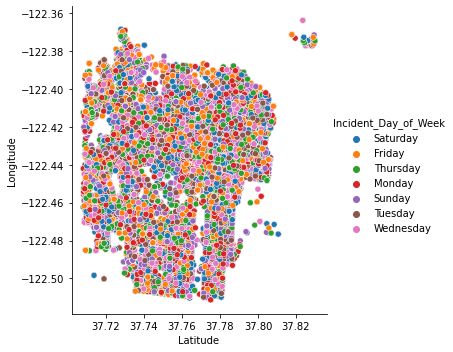

In [62]:
sns.relplot(x='Latitude', y ='Longitude', hue='Incident_Day_of_Week', data=df[df['year'] == 2018]) 
plt.rcParams['figure.figsize'] = [15,8]

In [63]:
df[['Incident_Category', 'Incident_Day_of_Week']].value_counts().head(20)

Incident_Category    Incident_Day_of_Week
Larceny Theft        Friday                  25455
                     Saturday                24360
                     Wednesday               22915
                     Monday                  22659
                     Thursday                22349
                     Sunday                  22246
                     Tuesday                 21547
Other Miscellaneous  Wednesday                6558
                     Friday                   6126
                     Thursday                 6000
                     Monday                   5893
                     Tuesday                  5858
Malicious Mischief   Friday                   5785
Other Miscellaneous  Saturday                 5717
                     Sunday                   5698
Malicious Mischief   Saturday                 5656
Assault              Saturday                 5445
Malicious Mischief   Monday                   5418
                     Wednesday          

In [64]:
category_freqency = pd.DataFrame(df['Incident_Category'].value_counts(normalize=True))
category_freqency.reset_index(inplace=True)
category_freqency.rename({'index': 'Incident_Category', 'Incident_Category': 'Frequency'}, axis='columns', inplace=True)
category_freqency['Cumulative_Freq'] = category_freqency['Frequency'].cumsum()
category_freqency

Incident_Category  Frequency  Cumulative_Freq
0                                  Larceny Theft   0.291198         0.291198
1                            Other Miscellaneous   0.075445         0.366643
2                             Malicious Mischief   0.068320         0.434963
3                                        Assault   0.063325         0.498287
4                                   Non-Criminal   0.062903         0.561190
5                                       Burglary   0.059478         0.620668
6                            Motor Vehicle Theft   0.051338         0.672006
7                                        Warrant   0.031732         0.703738
8                                          Fraud   0.031561         0.735299
9                              Recovered Vehicle   0.029107         0.764406
10                                 Lost Property   0.025395         0.789801
11                                  Drug Offense   0.024231         0.814031
12                                       Robbery   0.023715         0.837746
13                                Missing Person   0.023120         0.860867
14                                Suspicious Occ   0.021521         0.882388
15                            Disorderly Conduct   0.017496         0.899883
16      Offences Against The Family And Children   0.014779         0.914662
17                      Traffic Violation Arrest   0.011042         0.925704
18                   Miscellaneous Investigation   0.010405         0.936109
19                                         Other   0.009374         0.945483
20                                Other Offenses   0.007739         0.953223
21                               Weapons Offense   0.006960         0.960183
22                          Weapons Carrying Etc   0.005722         0.965905
23                               Stolen Property   0.005340         0.971245
24                                  Case Closure   0.004422         0.975667
25                    Forgery And Counterfeiting   0.003807         0.979474
26                                         Arson   0.003005         0.982479
27                               Courtesy Report   0.002910         0.985389
28                             Traffic Collision   0.002356         0.987745
29                                     Vandalism   0.002122         0.989867
30                                  Prostitution   0.001601         0.991468
31                               Civil Sidewalks   0.001592         0.993059
32                                   Fire Report   0.001464         0.994523
33                                  Embezzlement   0.001390         0.995913
34                                   Sex Offense   0.001127         0.997040
35                             Vehicle Impounded   0.000672         0.997712
36                                       Suicide   0.000447         0.998159
37                             Vehicle Misplaced   0.000427         0.998587
38                                Drug Violation   0.000335         0.998922
39                                          Rape   0.000258         0.999180
40    Human Trafficking (A), Commercial Sex Acts   0.000218         0.999398
41                                    Suspicious   0.000164         0.999562
42                          Motor Vehicle Theft?   0.000121         0.999683
43                                      Homicide   0.000117         0.999800
44                                   Liquor Laws   0.000079         0.999879
45                                      Gambling   0.000047         0.999926
46                               Weapons Offence   0.000036         0.999962
47        Human Trafficking, Commercial Sex Acts   0.000036         0.999998
48  Human Trafficking (B), Involuntary Servitude   0.000002         1.000000

In [65]:
Top_class1 = list(category_freqency.loc[category_freqency['Frequency'] > 0.02, 'Incident_Category'])
Top_class1

['Larceny Theft',
 'Other Miscellaneous',
 'Malicious Mischief',
 'Assault',
 'Non-Criminal',
 'Burglary',
 'Motor Vehicle Theft',
 'Warrant',
 'Fraud',
 'Recovered Vehicle',
 'Lost Property',
 'Drug Offense',
 'Robbery',
 'Missing Person',
 'Suspicious Occ']

In [66]:
Top_class = list(category_freqency.loc[category_freqency['Cumulative_Freq'] < 0.8, 'Incident_Category'])
Top_class

['Larceny Theft',
 'Other Miscellaneous',
 'Malicious Mischief',
 'Assault',
 'Non-Criminal',
 'Burglary',
 'Motor Vehicle Theft',
 'Warrant',
 'Fraud',
 'Recovered Vehicle',
 'Lost Property']

In [67]:
reduced_cat = df.loc[df['Incident_Category'].isin(Top_class)]
reduced_cat

Incident_Date Incident_Time Incident_Day_of_Week     Report_Datetime  \
0         2019-03-05         21:00              Tuesday 2019-03-07 12:54:00   
1         2018-12-22         12:00             Saturday 2018-12-26 14:29:00   
2         2018-08-24         17:30               Friday 2018-08-24 19:35:00   
3         2018-10-20         15:10             Saturday 2018-10-20 15:10:00   
5         2019-02-12         07:00              Tuesday 2019-02-12 09:20:00   
...              ...           ...                  ...                 ...   
554704    2020-09-12         19:35             Saturday 2020-09-12 19:35:00   
554706    2020-07-16         16:00             Thursday 2020-07-17 13:26:00   
554708    2020-08-01         17:34             Saturday 2020-08-01 18:04:00   
554709    2020-06-01         01:55               Monday 2020-06-01 01:55:00   
554710    2020-10-24         17:00             Saturday 2020-10-24 18:34:00   

        Incident_ID Report_Type_Code Report_Type_Description  Filed_Online  \
0            778087               II        Coplogic Initial          True   
1            752469               VI         Vehicle Initial         False   
2            706753               II                 Initial         False   
3            728264               IS      Initial Supplement         False   
5            769624               II                 Initial         False   
...             ...              ...                     ...           ...   
554704       960843               II                 Initial         False   
554706       944589               II                 Initial         False   
554708       949118               II                 Initial         False   
554709       931920               II                 Initial         False   
554710       972316               II                 Initial         False   

        Incident_Code    Incident_Category           Incident_Subcategory  \
0                6372        Larceny Theft          Larceny Theft - Other   
1                7023  Motor Vehicle Theft            Motor Vehicle Theft   
2                6243        Larceny Theft         Larceny - From Vehicle   
3               62071              Warrant                          Other   
5                6304        Larceny Theft  Larceny Theft - From Building   
...               ...                  ...                            ...   
554704          27068  Other Miscellaneous                          Other   
554706           6301        Larceny Theft  Larceny Theft - From Building   
554708           6361        Larceny Theft    Larceny Theft - Shoplifting   
554709           5061             Burglary          Burglary - Commercial   
554710           6244        Larceny Theft         Larceny - From Vehicle   

                         Incident_Description            Resolution  \
0             Theft, Other Property, $50-$200        Open or Active   
1                 Vehicle, Stolen, Motorcycle        Open or Active   
2       Theft, From Locked Vehicle, $200-$950        Open or Active   
3                            Probation Search  Cite or Arrest Adult   
5                 Theft, From Building, >$950        Open or Active   
...                                       ...                   ...   
554704              False Report of Emergency        Open or Active   
554706             Theft, From Building, <$50        Open or Active   
554708               Theft, Shoplifting, <$50        Open or Active   
554709    Burglary, Warehouse, Forcible Entry        Open or Active   
554710      Theft, From Locked Vehicle, >$950        Open or Active   

               CNN Police_District           Analysis_Neighborhood  \
0       30044000.0      Tenderloin                      Tenderloin   
1       25931000.0        Northern                    Hayes Valley   
2       21610000.0       Ingleside                       Excelsior   
3       23914000.0        Southern                 South of Mar

In [68]:
df2=reduced_cat

Text(0.5, 1.0, 'The Most  Common Occuring Crimes in San Francisco')

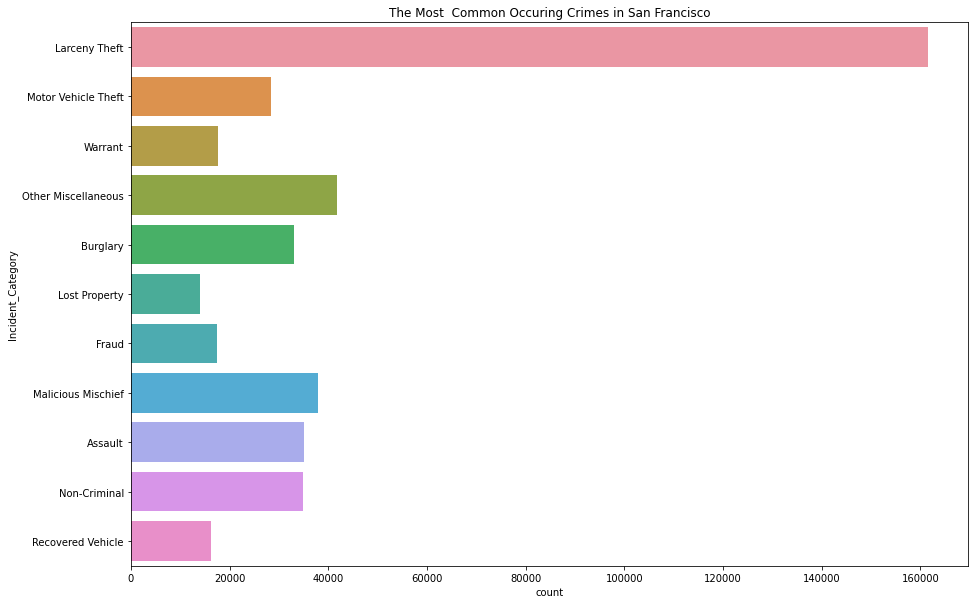

In [69]:
fig, count = plt.subplots(figsize = (15,10))
count = sns.countplot(y = reduced_cat['Incident_Category'])
count.set_title('The Most  Common Occuring Crimes in San Francisco')  

##**Most Common Crimes in San Francisco** 


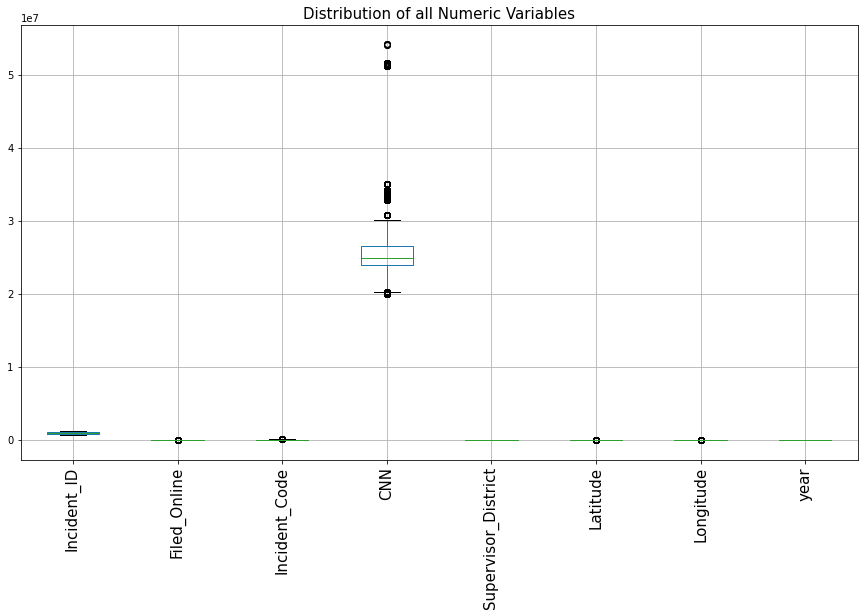

In [70]:
# plot a boxplot to visualize the outliers in all the numeric variables
df2.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


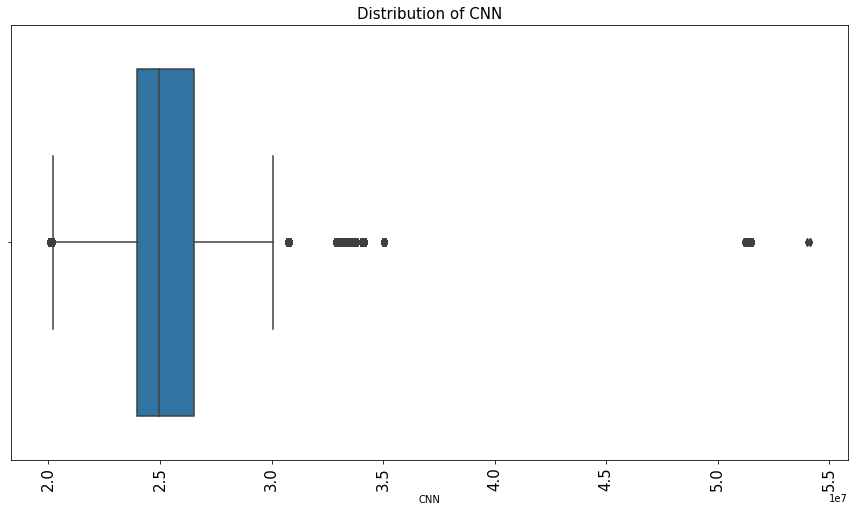

In [71]:
sns.boxplot(df2['CNN'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of CNN', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


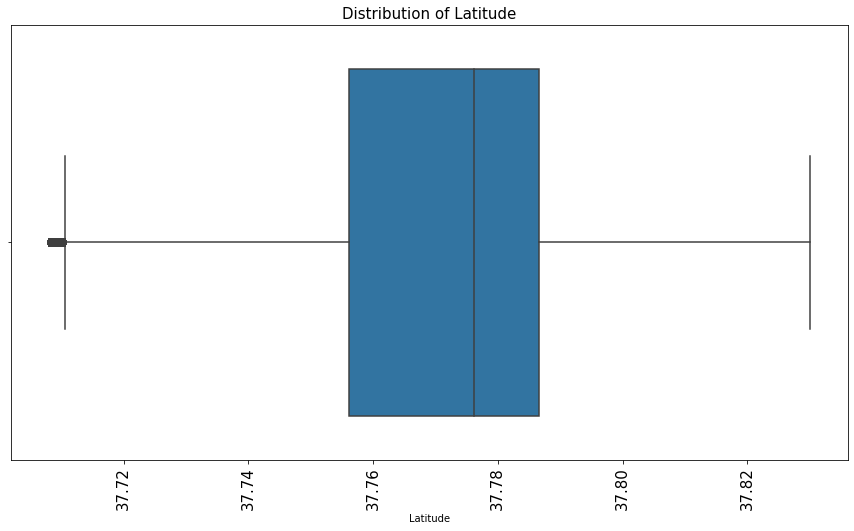

In [72]:
sns.boxplot(df2['Latitude'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Latitude', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


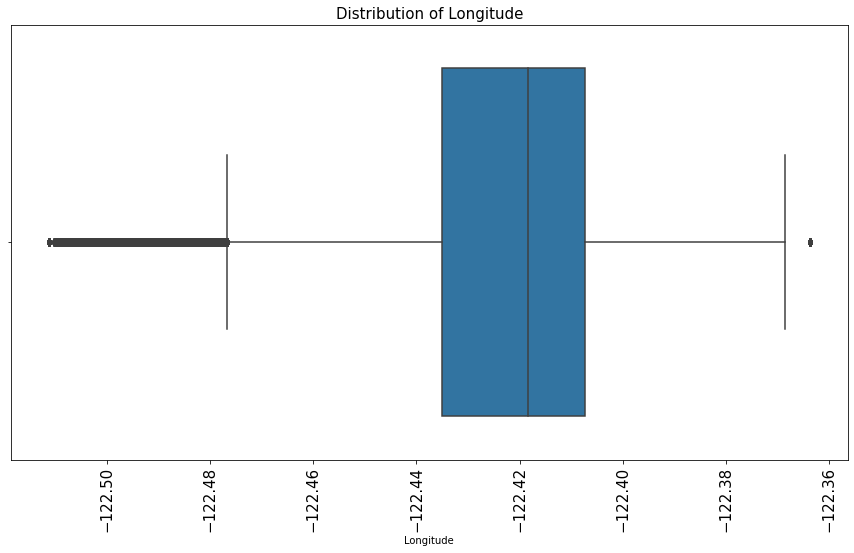

In [73]:

sns.boxplot(df2['Longitude'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Longitude', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

### **LARCENY THEFT**

In [74]:
Larceny_Theft = reduced_cat.loc[reduced_cat['Incident_Category'] == 'Larceny Theft']
Larceny_Theft

Incident_Date Incident_Time Incident_Day_of_Week     Report_Datetime  \
0         2019-03-05         21:00              Tuesday 2019-03-07 12:54:00   
2         2018-08-24         17:30               Friday 2018-08-24 19:35:00   
5         2019-02-12         07:00              Tuesday 2019-02-12 09:20:00   
17        2018-11-18         20:20               Sunday 2018-11-18 21:10:00   
18        2019-04-06         23:30             Saturday 2019-04-07 13:55:00   
...              ...           ...                  ...                 ...   
554697    2020-06-04         16:00             Thursday 2020-06-05 11:37:00   
554702    2020-07-30         02:14             Thursday 2020-07-30 14:36:00   
554706    2020-07-16         16:00             Thursday 2020-07-17 13:26:00   
554708    2020-08-01         17:34             Saturday 2020-08-01 18:04:00   
554710    2020-10-24         17:00             Saturday 2020-10-24 18:34:00   

        Incident_ID Report_Type_Code Report_Type_Description  Filed_Online  \
0            778087               II        Coplogic Initial          True   
2            706753               II                 Initial         False   
5            769624               II                 Initial         False   
17           738957               II                 Initial         False   
18           789131               IS      Initial Supplement         False   
...             ...              ...                     ...           ...   
554697       933204               II        Coplogic Initial          True   
554702       948446               II                 Initial         False   
554706       944589               II                 Initial         False   
554708       949118               II                 Initial         False   
554710       972316               II                 Initial         False   

        Incident_Code Incident_Category           Incident_Subcategory  \
0                6372     Larceny Theft          Larceny Theft - Other   
2                6243     Larceny Theft         Larceny - From Vehicle   
5                6304     Larceny Theft  Larceny Theft - From Building   
17               6244     Larceny Theft         Larceny - From Vehicle   
18               6154     Larceny Theft          Larceny Theft - Other   
...               ...               ...                            ...   
554697           6244     Larceny Theft         Larceny - From Vehicle   
554702           6244     Larceny Theft         Larceny - From Vehicle   
554706           6301     Larceny Theft  Larceny Theft - From Building   
554708           6361     Larceny Theft    Larceny Theft - Shoplifting   
554710           6244     Larceny Theft         Larceny - From Vehicle   

                                     Incident_Description      Resolution  \
0                         Theft, Other Property, $50-$200  Open or Active   
2                   Theft, From Locked Vehicle, $200-$950  Open or Active   
5                             Theft, From Building, >$950  Open or Active   
17                      Theft, From Locked Vehicle, >$950  Open or Active   
18      Theft, From Person, >$950 (other than Pickpocket)  Open or Active   
...                                                   ...             ...   
554697                  Theft, From Locked Vehicle, >$950  Open or Active   
554702                  Theft, From Locked Vehicle, >$950  Open or Active   
554706                         Theft, From Building, <$50  Open or Active   
554708                           Theft, Shoplifting, <$50  Open or Active   
554710                  Theft, From Locked Vehicle, >$950  Open or Active   

               CNN Police_District           Analysis_Neighborhood  \
0       30044000.0      Tenderloin                      Tenderloin   
2       21610000.0       Ingleside                       Excelsior   
5       24620000.0        Southern  Financial District/South Beach   
17      26834000.0        R

In [75]:
Larceny_Theft.value_counts()

Incident_Date  Incident_Time  Incident_Day_of_Week  Report_Datetime      Incident_ID  Report_Type_Code  Report_Type_Description  Filed_Online  Incident_Code  Incident_Category  Incident_Subcategory    Incident_Description                                     Resolution      CNN         Police_District  Analysis_Neighborhood           Supervisor_District  Latitude   Longitude    year
2018-01-01     00:00          Monday                2018-01-01 11:52:00  619210       II                Coplogic Initial         True          6374           Larceny Theft      Larceny Theft - Other   Theft, Other Property, >$950                             Open or Active  24918000.0  Central          Financial District/South Beach  3.0                  37.788293  -122.408402  2018    1
2020-08-29     10:56          Saturday              2020-08-29 14:17:00  957377       II                Coplogic Initial         True          6244           Larceny Theft      Larceny - From Vehicle  Theft, From Locked Vehic

In [76]:
df2['Incident_Category'].value_counts()


Larceny Theft          161531
Other Miscellaneous     41850
Malicious Mischief      37898
Assault                 35127
Non-Criminal            34893
Burglary                32993
Motor Vehicle Theft     28478
Warrant                 17602
Fraud                   17507
Recovered Vehicle       16146
Lost Property           14087
Name: Incident_Category, dtype: int64

In [77]:
Larceny_Theft['Incident_Description'].unique()


array(['Theft, Other Property, $50-$200',
       'Theft, From Locked Vehicle, $200-$950',
       'Theft, From Building, >$950', 'Theft, From Locked Vehicle, >$950',
       'Theft, From Person, >$950 (other than Pickpocket)',
       'Theft, From Building, <$50',
       'Theft, From Unlocked Vehicle, >$950',
       'Theft, Other Property, >$950',
       'Theft of Computers or Cell Phones', 'Theft, Shoplifting, <$50',
       'License Plate, Stolen', 'Theft, From Building, $50-$200',
       'Theft, Shoplifting, $50-$200', 'Theft, Pickpocket, $50-$200',
       'Theft, From Locked Vehicle, $50-$200',
       'Theft, Other Property, <$50', 'Theft from Merchant or Library',
       'Theft, Shoplifting, $200-$950',
       'Theft, From Locked Vehicle, <$50',
       'Theft, Other Property, $200-$950',
       'Theft, From Unlocked Vehicle, $200-$950',
       'Theft, Pickpocket, >$950', 'Theft of Animals (general)',
       'Theft of Checks or Credit Cards', 'Theft, Shoplifting, >$950',
       'Theft,

Text(0.5, 1.0, 'Larceny Theft Descriptions Count')

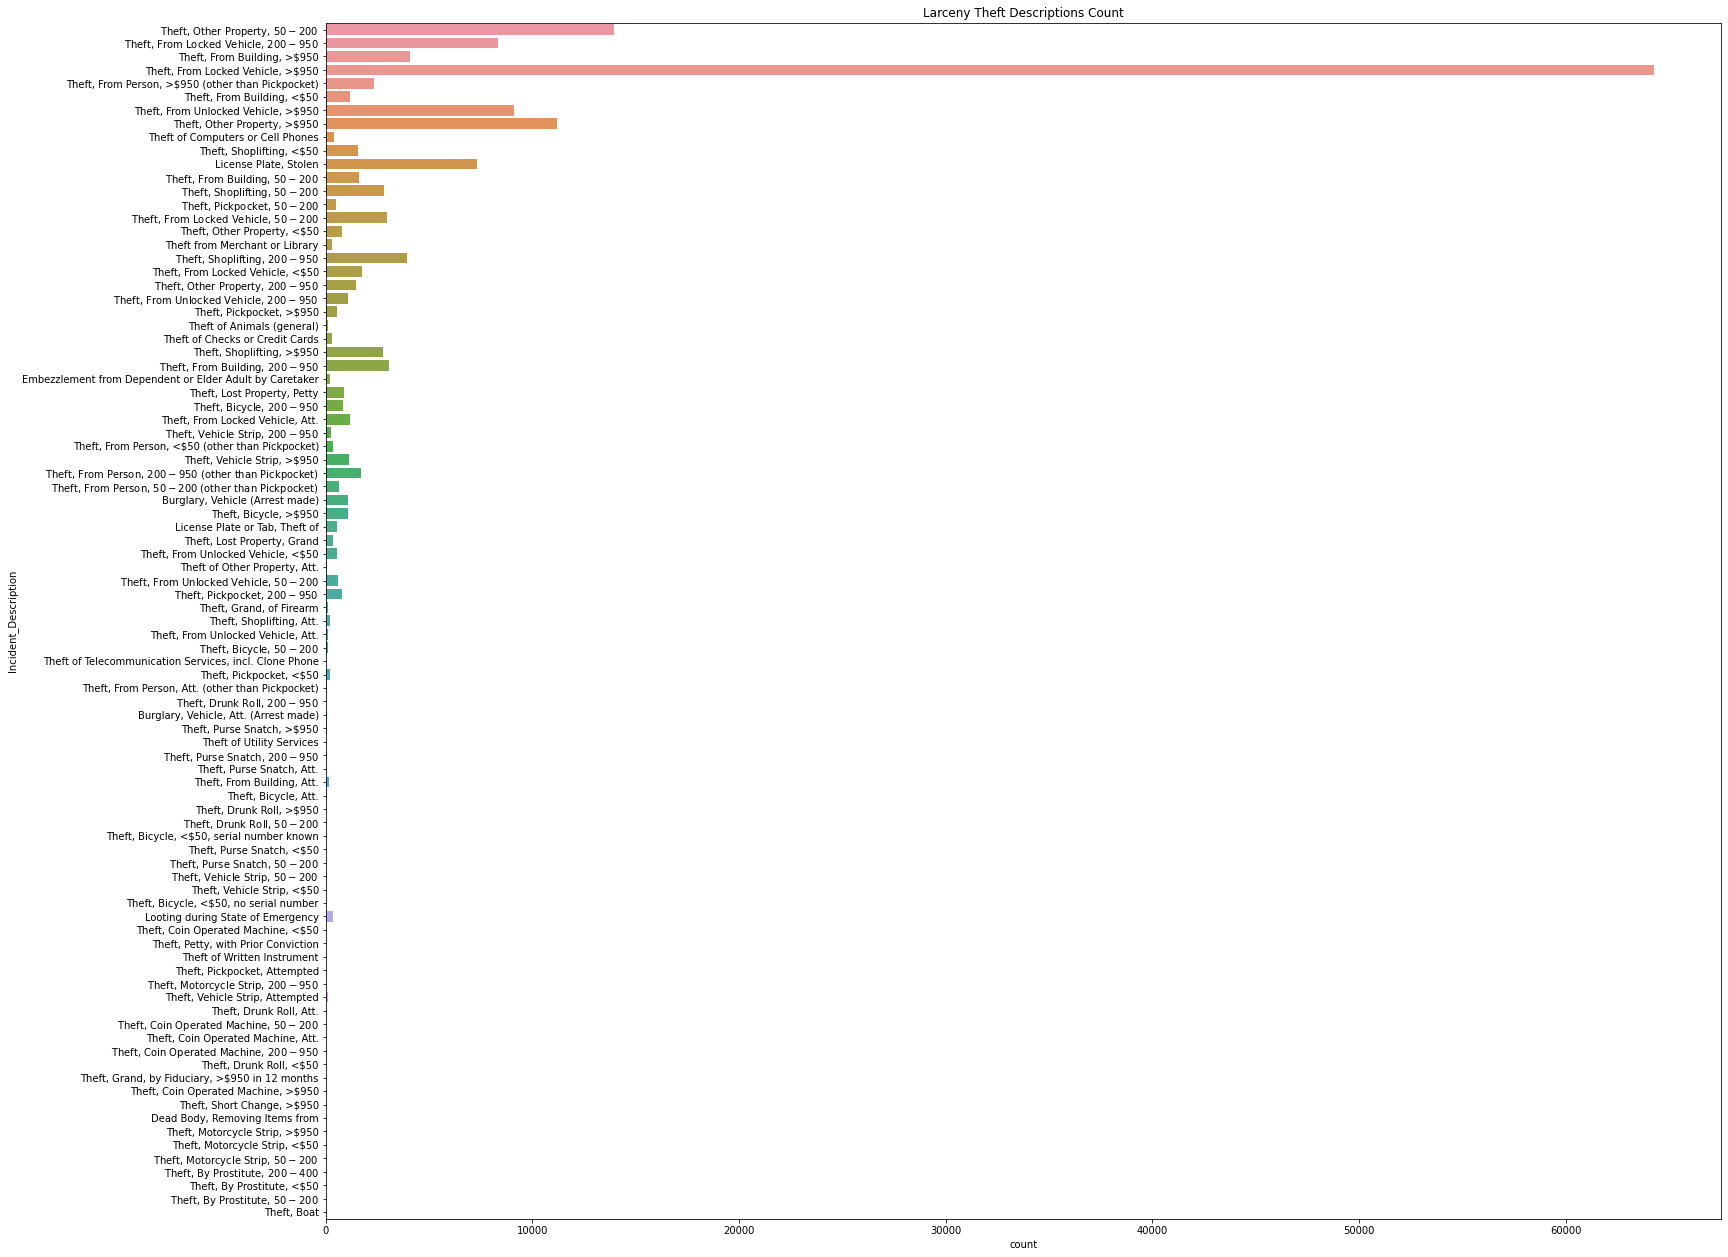

In [78]:
fig, count = plt.subplots(figsize = (25,22))
count = sns.countplot(y = Larceny_Theft['Incident_Description'])
count.set_title('Larceny Theft Descriptions Count')

### **ASSAULT**

In [81]:
Assault= reduced_cat.loc[reduced_cat['Incident_Category'] == 'Assault']
Assault

Incident_Date Incident_Time Incident_Day_of_Week     Report_Datetime  \
13        2019-05-24         18:45               Friday 2019-05-24 18:49:00   
29        2018-08-18         10:58             Saturday 2018-08-18 11:11:00   
40        2018-10-04         23:20             Thursday 2018-10-10 11:30:00   
106       2018-11-19         06:25               Monday 2018-11-19 06:27:00   
136       2019-06-17         19:30               Monday 2019-06-17 20:52:00   
...              ...           ...                  ...                 ...   
554650    2020-11-24         07:15              Tuesday 2020-11-24 07:20:00   
554668    2020-08-15         19:05             Saturday 2020-08-15 19:28:00   
554693    2021-01-16         21:19             Saturday 2021-01-16 21:20:00   
554695    2020-10-01         13:54             Thursday 2020-10-02 11:37:00   
554701    2020-12-15         20:45              Tuesday 2020-12-15 20:46:00   

        Incident_ID Report_Type_Code Report_Type_Description  Filed_Online  \
13           804508               II                 Initial         False   
29           704397               II                 Initial         False   
40           724689               IS      Initial Supplement         False   
106          739138               II                 Initial         False   
136          812679               II                 Initial         False   
...             ...              ...                     ...           ...   
554650       981133               II                 Initial         False   
554668       953148               II                 Initial         False   
554693       997019               IS      Initial Supplement         False   
554695       966224               II                 Initial         False   
554701       987271               II                 Initial         False   

        Incident_Code Incident_Category Incident_Subcategory  \
13               4134           Assault       Simple Assault   
29               4092           Assault   Aggravated Assault   
40               4013           Assault   Aggravated Assault   
106              4014           Assault   Aggravated Assault   
136              4134           Assault       Simple Assault   
...               ...               ...                  ...   
554650           4134           Assault       Simple Assault   
554668           4134           Assault       Simple Assault   
554693           4092           Assault   Aggravated Assault   
554695           4134           Assault       Simple Assault   
554701           4144           Assault       Simple Assault   

                        Incident_Description            Resolution  \
13                                   Battery        Open or Active   
29               Assault, Aggravated, W/ Gun        Open or Active   
40      Assault, Aggravated, W/ Other Weapon        Open or Active   
106            Assault, Aggravated, W/ Force        Open or Active   
136                                  Battery        Open or Active   
...                                      ...                   ...   
554650                               Battery        Open or Active   
554668                               Battery        Open or Active   
554693           Assault, Aggravated, W/ Gun  Cite or Arrest Adult   
554695                               Battery        Open or Active   
554701                       Battery, Sexual        Open or Active   

               CNN Police_District Analysis_Neighborhood  Supervisor_District  \
13      25206000.0         Central              Nob Hill                  3.0   
29      20572000.0         Bayview               Portola                  9.0   
40      26282000.0            Park        Haight Ashbury                  5.0   
106     25968000.0        Northern      Western Addition                  5.0   
136     24171000.0         Mission               Mission                  9.0   
...            ...       

In [82]:
Assault['Incident_Description'].unique()

array(['Battery', 'Assault, Aggravated, W/ Gun',
       'Assault, Aggravated, W/ Other Weapon',
       'Assault, Aggravated, W/ Force',
       'Assault to Commit Mayhem or Specific Sex Offenses',
       'Shooting into Inhabited Dwelling or Occupied Vehicle',
       'Assault, Aggravated, W/ Knife',
       'Battery, former Spouse or Dating Relationship',
       'Assault, W/ Caustic Chemical to Injure or Disfigure',
       'Battery with Serious Injuries', 'Battery, Sexual',
       'Assault, Att. Homicide, W/ Knife', 'False Imprisonment',
       'Battery, Of A Police Officer',
       'Assault, Att. Homicide, W/ Other Weapon',
       'Assault, Non-Aggravated', 'Assault, Att. Homicide, W/ Gun',
       'Assault, Non-Aggravated, Att.',
       'Assault, Aggravated, On Police Off., W/ Other Weapon',
       'Firearm, Discharging at Unoccupied Bldg, Vehicle or Aircraft',
       'Assault, Aggravated, On Police Officer, W/ Force',
       'Firearm, Discharging in Grossly Negligent Manner',
       'As

In [83]:
Assault.value_counts()

Incident_Date  Incident_Time  Incident_Day_of_Week  Report_Datetime      Incident_ID  Report_Type_Code  Report_Type_Description  Filed_Online  Incident_Code  Incident_Category  Incident_Subcategory  Incident_Description                                  Resolution      CNN         Police_District  Analysis_Neighborhood           Supervisor_District  Latitude   Longitude    year
2018-01-01     00:55          Monday                2018-01-01 01:41:00  618691       II                Initial                  False         4134           Assault            Simple Assault        Battery                                               Open or Active  23866000.0  Mission          Mission                         10.0                 37.768473  -122.405828  2018    1
2020-10-17     20:07          Saturday              2020-10-17 20:07:00  970393       II                Initial                  False         4011           Assault            Aggravated Assault    Assault, Aggravated, W/ Gun         

Text(0.5, 1.0, 'Different Assualt Descriptions Count')

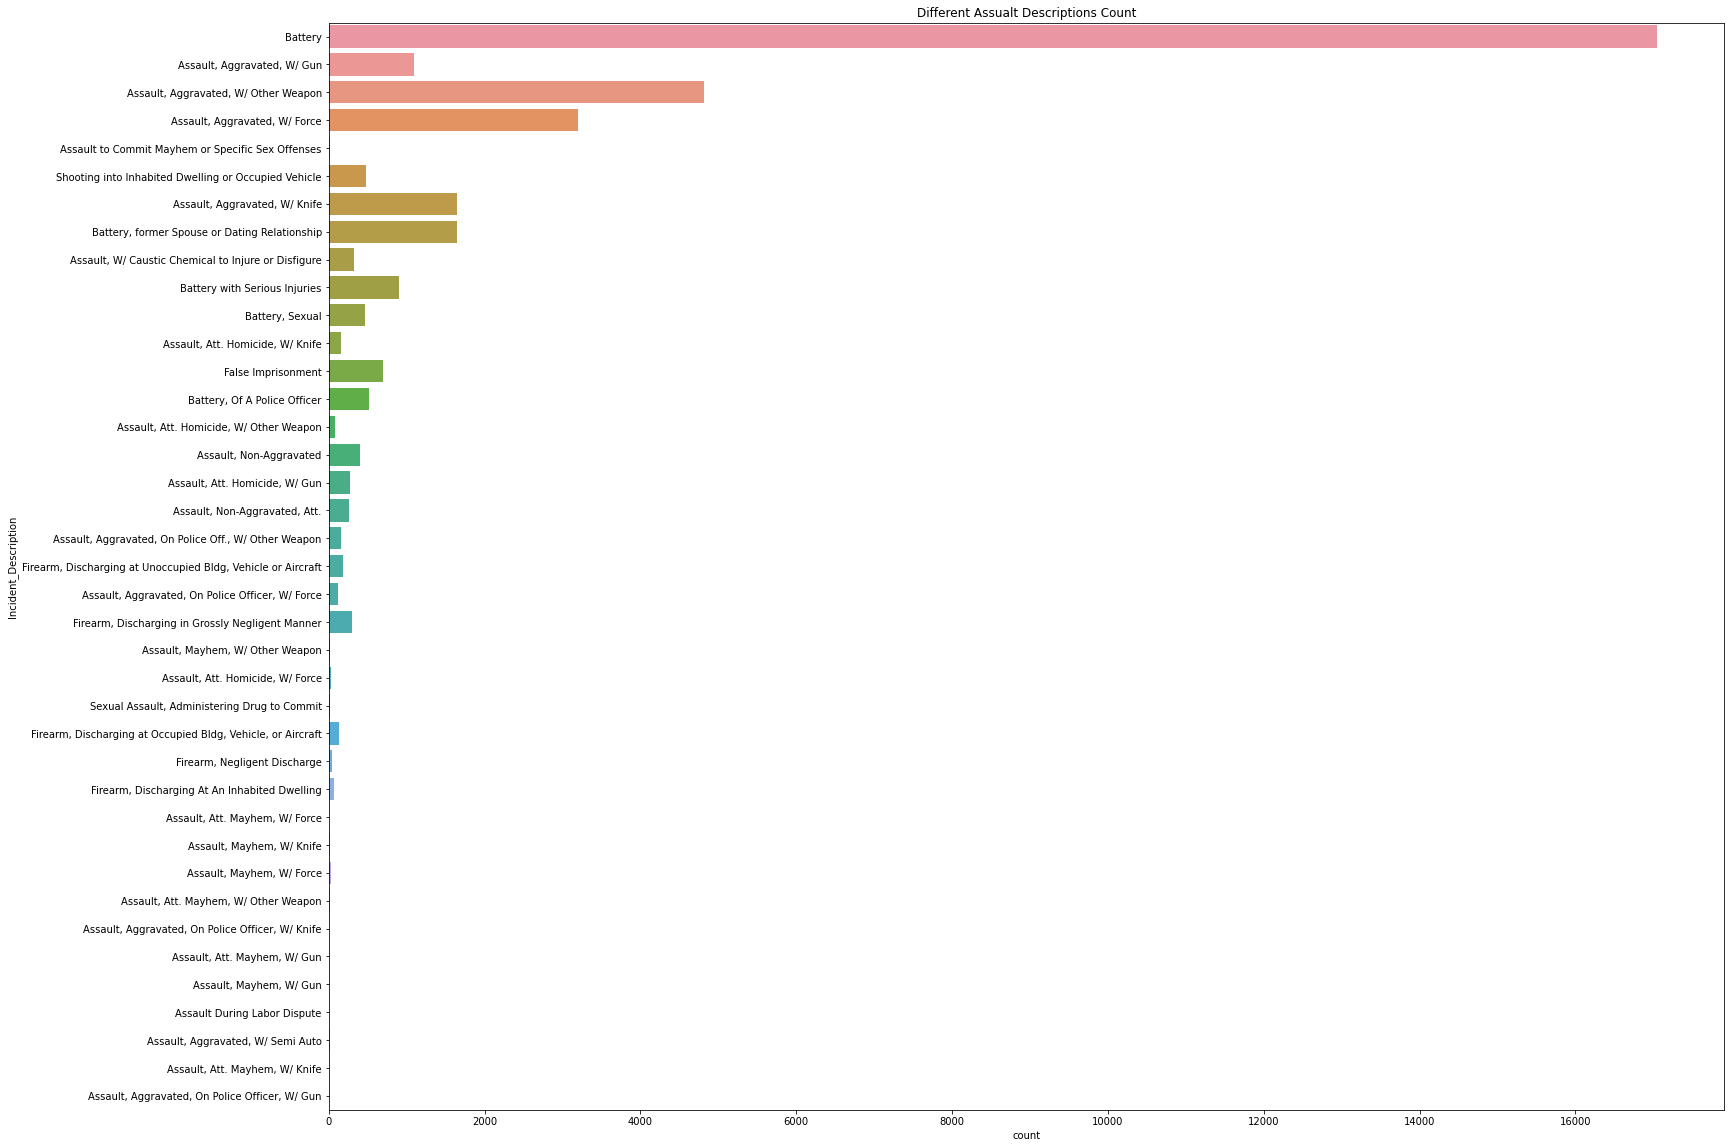

In [84]:
fig, count = plt.subplots(figsize = (25,20))
count = sns.countplot(y = Assault['Incident_Description'])
count.set_title('Different Assualt Descriptions Count')

In [85]:
df['Incident_Category'].value_counts()

Larceny Theft                                   161531
Other Miscellaneous                              41850
Malicious Mischief                               37898
Assault                                          35127
Non-Criminal                                     34893
Burglary                                         32993
Motor Vehicle Theft                              28478
Warrant                                          17602
Fraud                                            17507
Recovered Vehicle                                16146
Lost Property                                    14087
Drug Offense                                     13441
Robbery                                          13155
Missing Person                                   12825
Suspicious Occ                                   11938
Disorderly Conduct                                9705
Offences Against The Family And Children          8198
Traffic Violation Arrest                          6125
Miscellane

### **BURGLARY**

In [86]:
Burglary = reduced_cat.loc[reduced_cat['Incident_Category'] == 'Burglary']
Burglary

Incident_Date Incident_Time Incident_Day_of_Week     Report_Datetime  \
7         2018-10-04         09:00             Thursday 2018-10-04 09:00:00   
50        2018-12-05         09:30            Wednesday 2019-02-12 02:17:00   
102       2019-04-01         02:00               Monday 2019-04-02 15:45:00   
206       2019-02-26         18:15              Tuesday 2019-02-27 15:22:00   
212       2018-09-07         06:00               Friday 2018-09-07 06:14:00   
...              ...           ...                  ...                 ...   
554646    2020-05-11         16:45               Monday 2020-05-18 09:34:00   
554658    2020-10-02         08:30               Friday 2020-10-20 09:45:00   
554659    2020-05-25         05:40               Monday 2020-05-25 05:43:00   
554686    2020-07-24         00:30               Friday 2020-07-24 23:07:00   
554709    2020-06-01         01:55               Monday 2020-06-01 01:55:00   

        Incident_ID Report_Type_Code Report_Type_Description  Filed_Online  \
7            725578               IS      Initial Supplement         False   
50           769585               IS     Coplogic Supplement          True   
102          786145               II                 Initial         False   
206          774551               II                 Initial         False   
212          711676               II                 Initial         False   
...             ...              ...                     ...           ...   
554646       927908               II                 Initial         False   
554658       971285               IS     Coplogic Supplement          True   
554659       929880               II                 Initial         False   
554686       947734               IS     Coplogic Supplement          True   
554709       931920               II                 Initial         False   

        Incident_Code Incident_Category    Incident_Subcategory  \
7                5053          Burglary   Burglary - Commercial   
50               5073          Burglary        Burglary - Other   
102              5151          Burglary        Burglary - Other   
206              5073          Burglary        Burglary - Other   
212              5073          Burglary        Burglary - Other   
...               ...               ...                     ...   
554646           5041          Burglary  Burglary - Residential   
554658           5073          Burglary        Burglary - Other   
554659           5012          Burglary  Burglary - Residential   
554686           5073          Burglary        Burglary - Other   
554709           5061          Burglary   Burglary - Commercial   

                                  Incident_Description            Resolution  \
7                      Burglary, Store, Unlawful Entry  Cite or Arrest Adult   
50               Burglary, Other Bldg., Unlawful Entry        Open or Active   
102          Burglary, Non-residential, Forcible Entry        Open or Active   
206              Burglary, Other Bldg., Unlawful Entry        Open or Active   
212              Burglary, Other Bldg., Unlawful Entry        Open or Active   
...                                                ...                   ...   
554646             Burglary, Residence, Forcible Entry        Open or Active   
554658           Burglary, Other Bldg., Unlawful Entry        Open or Active   
554659  Burglary, Apartment House, Att. Forcible Entry  Cite or Arrest Adult   
554686           Burglary, Other Bldg., Unlawful Entry        Open or Active   
554709             Burglary, Warehouse, Forcible Entry        Open or Active   

               CNN Police_District           Analysis_Neighborhood  \
7       24739000.0         Central  Financial District/South Beach   
50      25703000.0       Ingleside             Castro/Upper Market   
102     24272000.0        Southern                 South of Market   
206     26557000.0        Northern                 Pacific Heights   
212  

In [87]:
Burglary['Incident_Description'].unique()

array(['Burglary, Store, Unlawful Entry',
       'Burglary, Other Bldg., Unlawful Entry',
       'Burglary, Non-residential, Forcible Entry',
       'Burglary, Residence, Forcible Entry',
       'Burglary, Apartment House, Unlawful Entry',
       'Burglary, Residence, Unlawful Entry',
       'Burglary, Hot Prowl, Forcible Entry',
       'Burglary, Non-residential, Unlawful Entry',
       'Burglary, Apartment House, Forcible Entry',
       'Burglary, Hot Prowl, Att. Forcible Entry',
       'Burglary, Apartment House, Att. Forcible Entry',
       'Burglary, Store, Forcible Entry',
       'Burglary, Hot Prowl, Unlawful Entry',
       'Burglary, Flat, Forcible Entry',
       'Burglary, Other Bldg., Forcible Entry',
       'Burglary, Residence, Att. Forcible Entry',
       'Burglary, Warehouse, Forcible Entry',
       'Burglary, Other Bldg., Att. Forcible Entry',
       'Burglary, Flat Under Constr., Forcible Entry',
       'Burglary, Residence Under Constr, Forcible Entry',
       'Burglar

In [88]:
Burglary.value_counts()

Incident_Date  Incident_Time  Incident_Day_of_Week  Report_Datetime      Incident_ID  Report_Type_Code  Report_Type_Description  Filed_Online  Incident_Code  Incident_Category  Incident_Subcategory    Incident_Description                       Resolution      CNN         Police_District  Analysis_Neighborhood           Supervisor_District  Latitude   Longitude    year
2018-01-01     00:01          Monday                2018-10-05 12:01:00  722403       II                Initial                  False         5013           Burglary           Burglary - Residential  Burglary, Apartment House, Unlawful Entry  Open or Active  26801000.0  Park             Western Addition                2.0                  37.782239  -122.440963  2018    1
2020-12-29     22:30          Tuesday               2020-12-30 09:24:00  991401       II                Initial                  False         5083           Burglary           Burglary - Hot Prowl    Burglary, Hot Prowl, Unlawful Entry        Open or A

Text(0.5, 1.0, 'Differnt Burglary Descriptions Count')

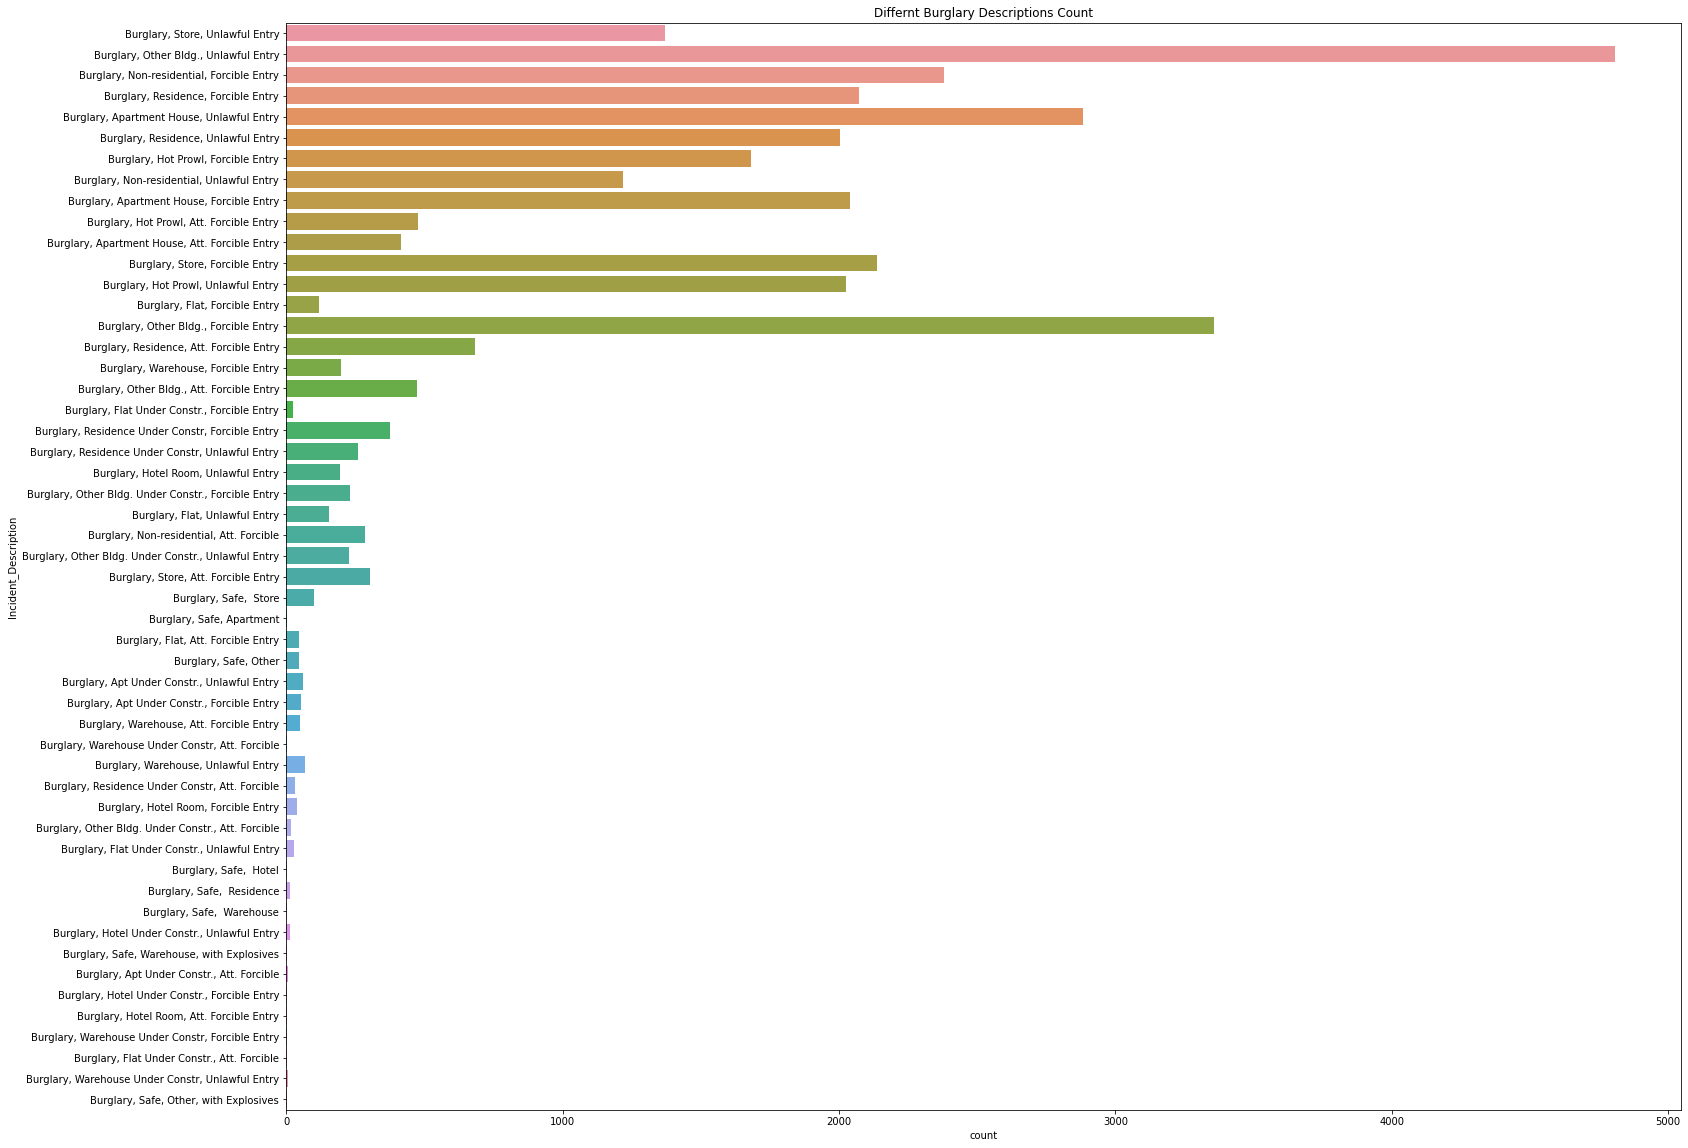

In [89]:
fig, count = plt.subplots(figsize = (25,20))
count = sns.countplot(y = Burglary['Incident_Description'])
count.set_title('Differnt Burglary Descriptions Count')

### **POLICE DISTRICTS**

In [92]:
df2 = reduced_cat

Text(0.5, 1.0, 'Different Police District vs Count')

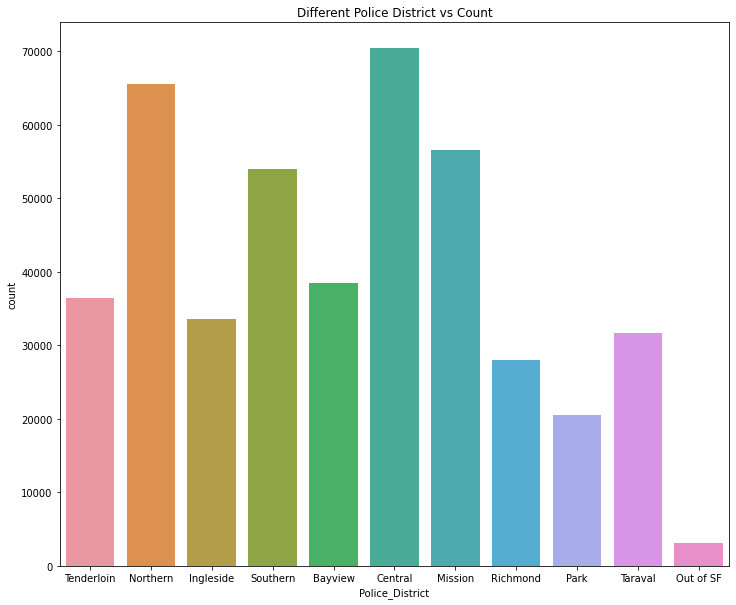

In [93]:
fig, count = plt.subplots(figsize = (12,10))
count = sns.countplot(x = df2['Police_District'])
count.set_title('Different Police District vs Count')

In [94]:
district_category = pd.crosstab(df2['Incident_Category'], df2['Police_District'])
district_category

Police_District      Bayview  Central  Ingleside  Mission  Northern  \
Incident_Category                                                     
Assault                 4078     3970       2802     5825      3886   
Burglary                2524     4835       2924     3812      5761   
Fraud                   1246     2504       1678     1813      2271   
Larceny Theft           9930    34036       9493    17625     30987   
Lost Property            740     2790        678     1962      1790   
Malicious Mischief      3813     6093       3275     4892      5430   
Motor Vehicle Theft     4686     2309       3874     3781      3247   
Non-Criminal            2504     4856       2976     4296      3927   
Other Miscellaneous     3707     6017       3184     7327      4827   
Recovered Vehicle       3913      835       1804     1811      1719   
Warrant                 1367     2145        894     3335      1730   

Police_District      Out of SF  Park  Richmond  Southern  Taraval  Tenderloin  
Incident_Category                                                              
Assault                    135  1112      1190      4656     1901        5572  
Burglary                    40  2222      2327      4522     2569        1457  
Fraud                      805   727      1282      1947     2249         985  
Larceny Theft              489  7860     12954     18155    11479        8523  
Lost Property              530   444       715      1927     1063        1448  
Malicious Mischief          65  1931      2277      4953     2848        2321  
Motor Vehicle Theft        273  1501      1873      2913     2756        1265  
Non-Criminal               187  1821      2139      4731     2867        4589  
Other Miscellaneous        226  1482      1885      5717     2179        5299  
Recovered Vehicle          181   606       933      1939     1113        1292  
Warrant                    141   756       439      2507      621        3667

Text(0.5, 1.0, 'Different Categories and    Districts')

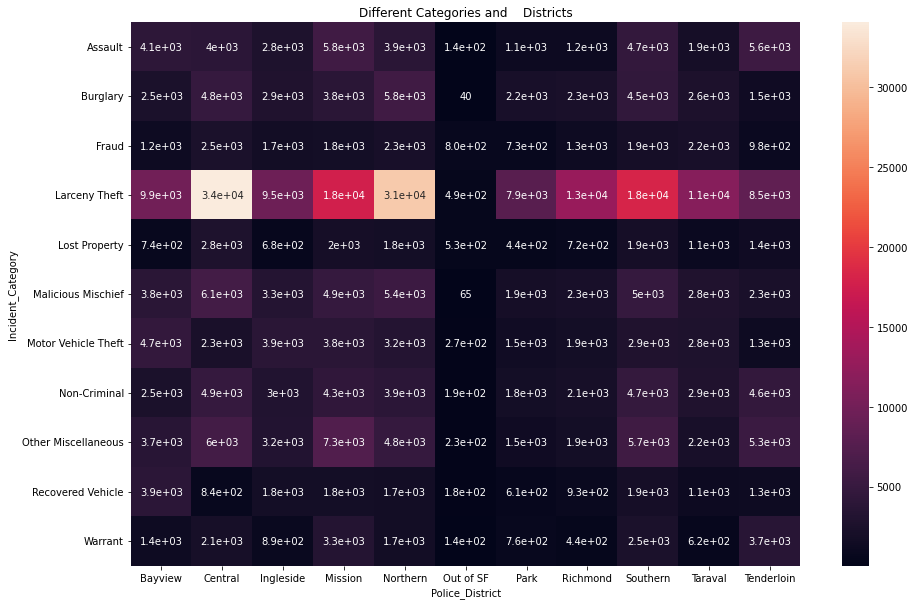

In [95]:
fig, heatmap = plt.subplots(figsize = (15,10))
heatmap = sns.heatmap(district_category, annot=True)
heatmap.set_title('Different Categories and    Districts')

Text(0.5, 1.0, 'Categories Count vs  District')

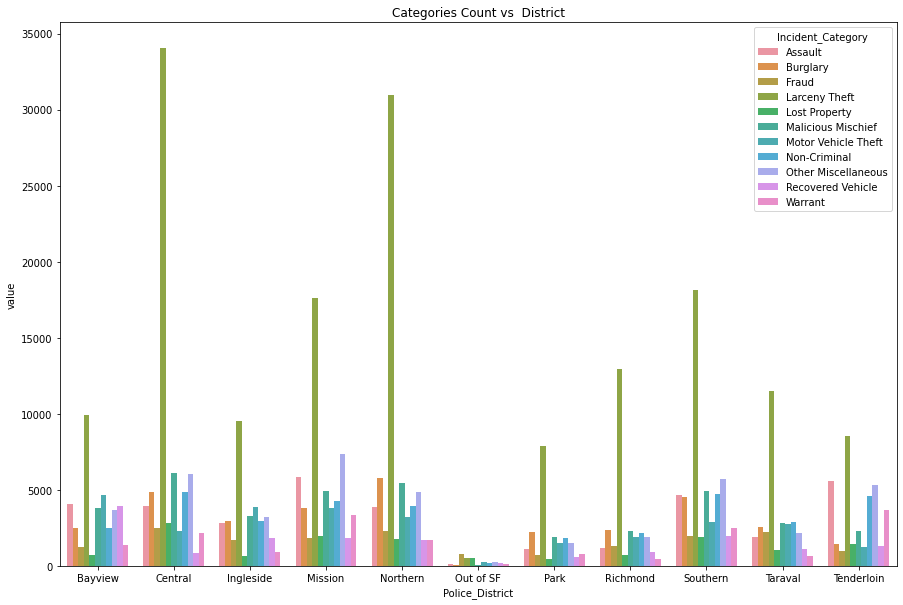

In [96]:
df3 = district_category.stack().reset_index().rename(columns={0:'value'})
fig, bar = plt.subplots(figsize = (15,10))
bar = sns.barplot(x=df3['Police_District'], y=df3['value'], hue=df3['Incident_Category'])
bar.set_title('Categories Count vs  District')

In [98]:
df5 = pd.DataFrame(df2.groupby('year')['Incident_Category'].count())
#df5['Incident_Year'] = df5['Incident_Year'].astype(int)
df5.reset_index(inplace=True)
df5

year  Incident_Category
0  2018             113398
1  2019             109954
2  2020              88457
3  2021              97262
4  2022              29041

# **Crime Counts from the 2018 - 2022**

[Text(0, 0, '0'),
 Text(0, 0, '2018'),
 Text(0, 0, '2018.5'),
 Text(0, 0, '2019'),
 Text(0, 0, '2019.5'),
 Text(0, 0, '2020'),
 Text(0, 0, '2020.5'),
 Text(0, 0, '2021'),
 Text(0, 0, '2021.5'),
 Text(0, 0, '2022')]

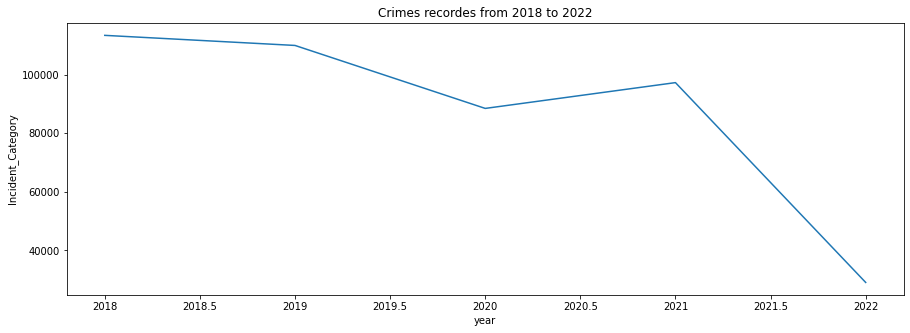

In [100]:
fig, line = plt.subplots(figsize = (15,5))
line = sns.lineplot(x = df5['year'], y=df5['Incident_Category'])
line.set_title('Crimes recordes from 2018 to 2022')
line.set_xticklabels([0,2018, 2018.5,2019, 2019.5,2020, 2020.5,2021, 2021.5,2022])

In [102]:
year_category = pd.crosstab(df2['year'], df2['Incident_Category'])
year_category

Incident_Category  Assault  Burglary  Fraud  Larceny Theft  Lost Property  \
year                                                                        
2018                  9041      7041   4727          44186           4693   
2019                  8855      5949   4640          44163           4338   
2020                  6982      9124   3653          28178           2094   
2021                  7752      8674   3390          34569           2192   
2022                  2497      2205   1097          10435            770   

Incident_Category  Malicious Mischief  Motor Vehicle Theft  Non-Criminal  \
year                                                                       
2018                             8459                 5240          9536   
2019                             8617                 5311          8995   
2020                             8447                 7464          6762   
2021                             9628                 7878          7504   
2022                             2747                 2585          2096   

Incident_Category  Other Miscellaneous  Recovered Vehicle  Warrant  
year                                                                
2018                             11712               3237     5526  
2019                             10599               3113     5374  
2020                              8434               4112     3207  
2021                              8714               4299     2662  
2022                              2391               1385      833

# **Most Occuring Crimes over the Years**

Text(0.5, 1.0, 'Different crimes from 2018 - 2022')

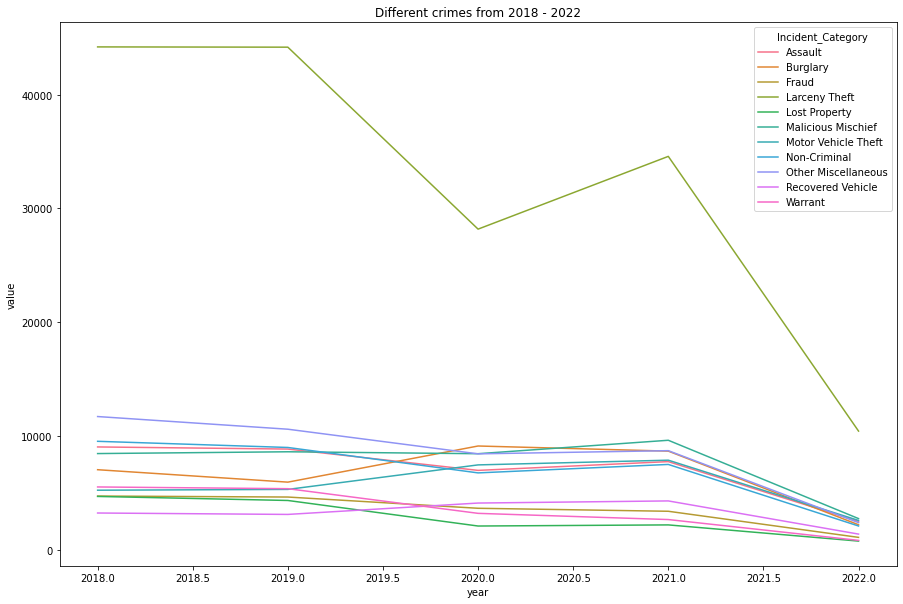

In [104]:
stack = year_category.stack().reset_index().rename(columns={0:'value'})
fit = stack['year'] != 2022
stacked = stack[fit]
fig, count = plt.subplots(figsize = (15,10))
line = sns.lineplot(x=stack['year'], y=stack['value'], hue=stack['Incident_Category'])
line.set_title('Different crimes from 2018 - 2022')

# Total Crime Count on different days

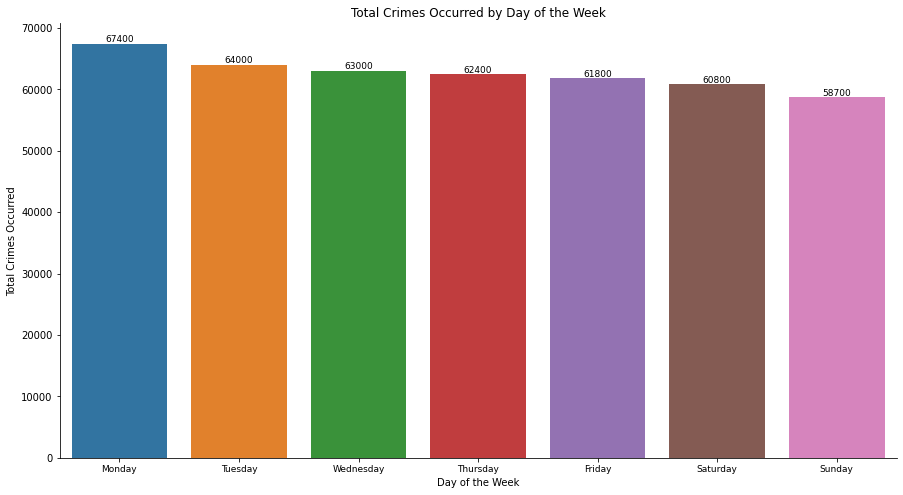

In [105]:
fig, ax = plt.subplots()

sns.barplot(x = df2["Incident_Day_of_Week"].value_counts().index, y = df2["Incident_Day_of_Week"].value_counts())

ax.set_title("Total Crimes Occurred by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

# **Occurance of different types of crimes in San Francisco in 2018**

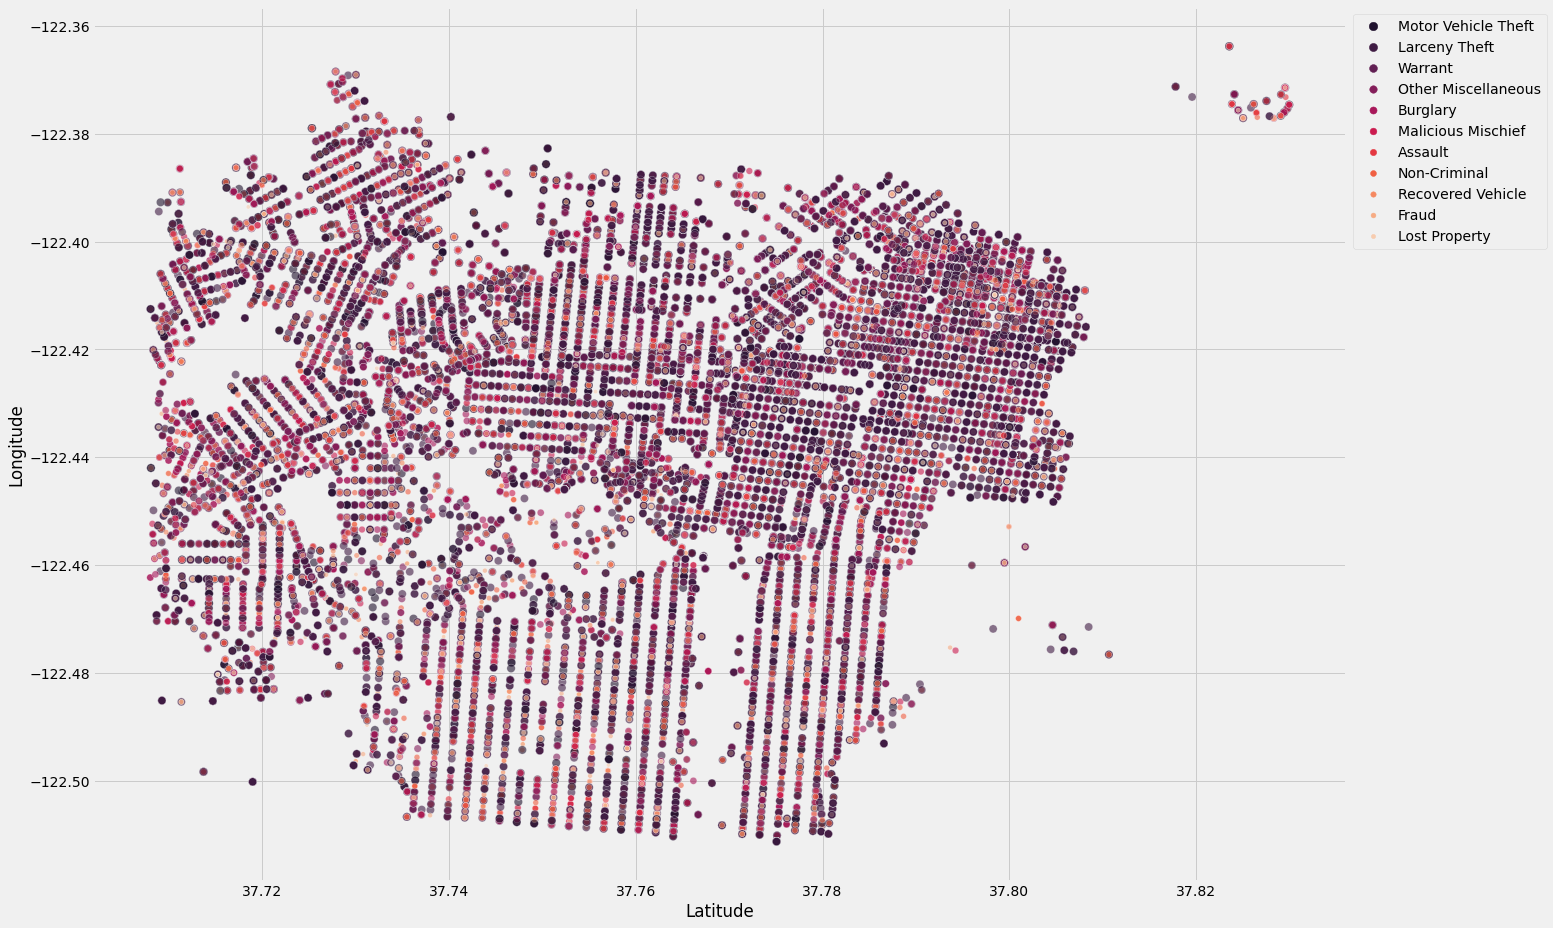

In [107]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['year']==2018], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

# **Occurance of different types of crimes in San Francisco in 2022**

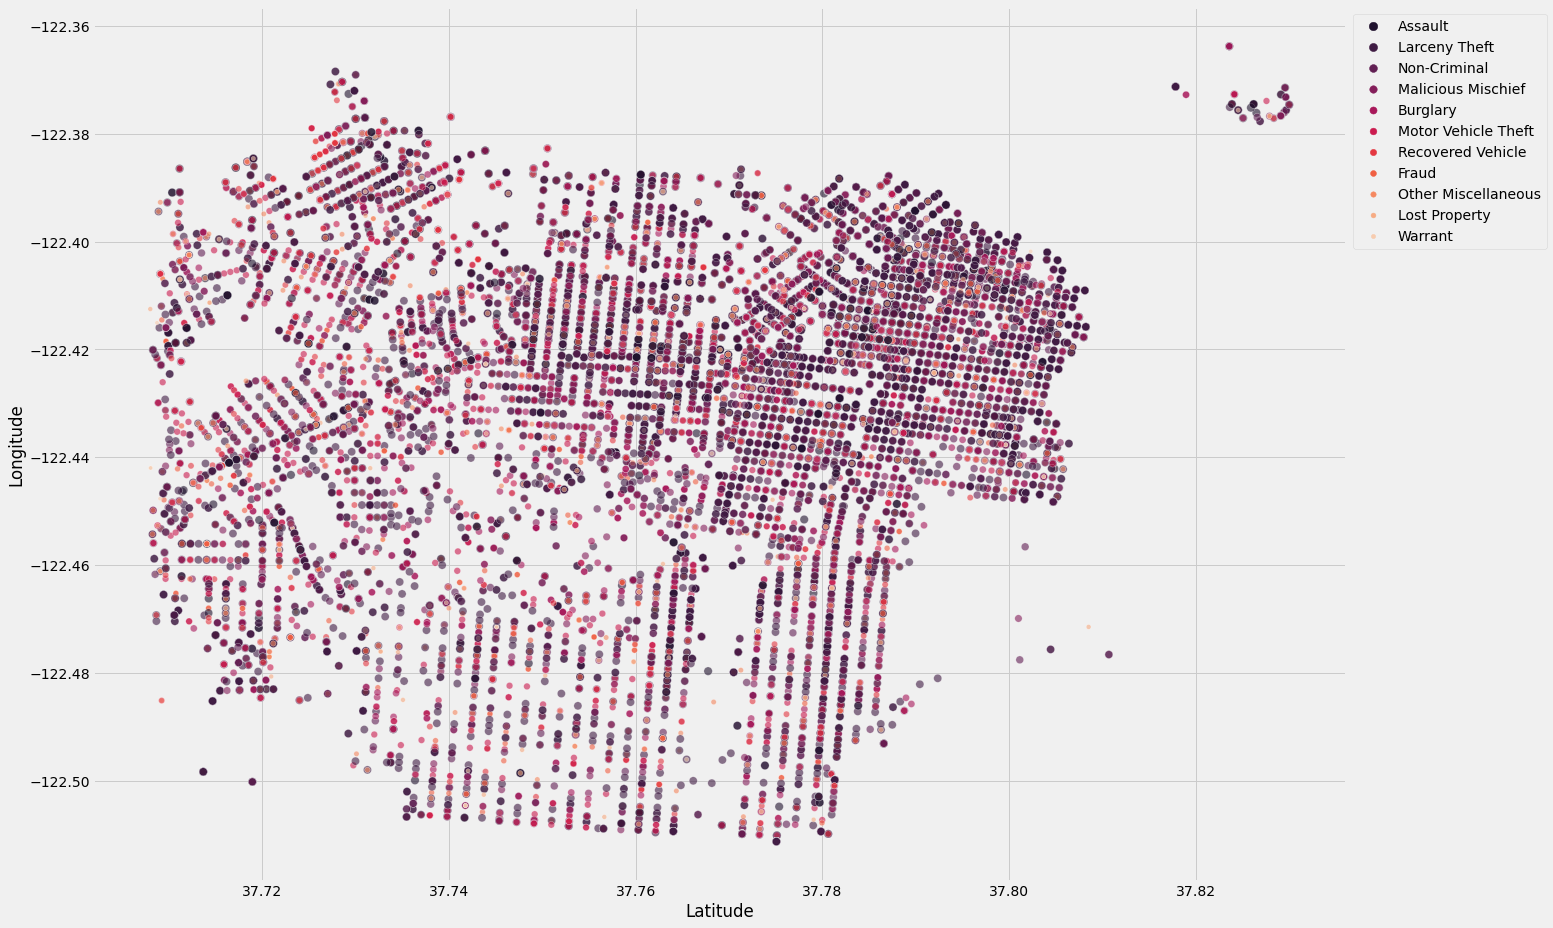

In [108]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['year']==2022], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')